# Analyzing Spain's Energy Mix: Trends, Challenges, and Opportunities for a Sustainable Future

Spain's energy mix plays a critical role in shaping its energy landscape and determining its path towards a sustainable future. Understanding the composition, trends, and challenges within the energy mix is essential for policymakers, energy planners, and stakeholders to make informed decisions and develop effective strategies.

In this analysis, I delved into the energy mix of Spain from 2015 to 2018, exploring the contributions of various energy sources and examining their patterns and dynamics. By analyzing the data and drawing insights from the observed trends, I aim to shed light on Spain's energy generation, its shift towards renewable sources, and the challenges that lie ahead.

The analysis reveals significant findings in terms of energy generation from nuclear, fossil fuels, and renewable sources such as wind, hydro, and solar. We examine their individual contributions, seasonal variations, hourly patterns, and their roles in meeting the country's energy demands.

I also explored the correlation between renewable and fossil fuel generation, identifying the interplay between these sources and the implications for Spain's energy transition. Additionally, we assess the impact of energy deficit and the need for increasing generation capacity to bridge the gap between supply and demand.

This analysis presents an opportunity to evaluate Spain's progress in achieving a sustainable and resilient energy system. By identifying key trends, challenges, and opportunities, I aim to provide valuable insights for policymakers, energy planners, and stakeholders to guide decision-making and shape the country's energy future.

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [2]:
# # sns.set('poster')
# plt.style.use('seaborn-dark-palette')
# # filterwarnings('ignore')
# plt.rcParams['axes.edgecolor'] = 'black'
# plt.rcParams['axes.labelcolor'] = 'black'
# # plt.rcParams['axes.labelweight'] = 'bold'
# plt.rcParams['axes.titlecolor'] ='black'
# # plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['figure.autolayout'] = True
# plt.rcParams['figure.edgecolor'] = 'black'
# plt.rcParams['figure.frameon'] = True
# plt.rcParams['font.family'] ='DejaVu Sans'
# # plt.rcParams['font.weight'] = 'bold'
# plt.rcParams['legend.edgecolor'] = 'black'
# # plt.rcParams['legend.fancybox'] = True
# # plt.rcParams['legend.frameon'] = True
# # plt.rcParams['legend.shadow'] = True

In [3]:
df = pd.read_csv('..\Energy_Projects\Energy\energy_dataset.csv')

In [4]:
energy_df=df.copy()

In [5]:
energy_df.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,NaN,920.0,1009.0,1658.0,0.0,7096.0,43.0,71.0,50.0,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,NaN,1164.0,973.0,1371.0,0.0,7099.0,43.0,73.0,50.0,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,NaN,1503.0,949.0,779.0,0.0,7098.0,43.0,75.0,50.0,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,NaN,1826.0,953.0,720.0,0.0,7097.0,43.0,74.0,42.0,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


# Data Description

- **time**: Hourly records or observation
- **generation biomass**: Energy generated from biomass
- **generation fossil brown coal/lignite**: Energy generated from lignite or brown coal
- **generation fossil gas**: Energy generated from Natural gas
- **generation fossil hard coal**: Energy generated from hard coal
- **generation fossil oil**: Energy generated from crude oil
- **generation hydro pumped storage consumption**: Energy generated from pumped storage
- **generation hydro water reservoir**: Energy generated from water reservoir 
- **generation nuclear**: Energy generated from nuclear energy
- **generation other**: Energy generated from other energy sources
- **generation other renewable**: Energy generated from other renewable energy 
- **generation solar**: Energy generated from solar energy
- **generation waste**: Energy generated from waste 
- **generation wind onshore**: Energy generated from wind
- **forecast solar day ahead**: Forecasted solar energy 
- **forecast wind onshore day ahead**: Forecasted wind energy
- **total load forecast**: Total forecasted energy demand / consumption
- **total load actual**: Total energy consumed
- **price actual**: Energy price

In [6]:
energy_df.shape

(35064, 29)

Data has 35,064 observations and 29 features

In [7]:
energy_df.columns

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual'],
      dtype='object')

In [8]:
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

In [9]:
energy_df.isna().sum()

time                                               0
generation biomass                                19
generation fossil brown coal/lignite              18
generation fossil coal-derived gas                18
generation fossil gas                             18
generation fossil hard coal                       18
generation fossil oil                             19
generation fossil oil shale                       18
generation fossil peat                            18
generation geothermal                             18
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption       19
generation hydro run-of-river and poundage        19
generation hydro water reservoir                  18
generation marine                                 19
generation nuclear                                17
generation other                                  18
generation other renewable                        18
generation solar                              

Observation 1: The columns "forecast wind offshore eday ahead" and "generation hydro pumped storage aggregated" do not contain any data and are empty throughout the dataset. To ensure data consistency and streamline analysis, it is recommended to remove these columns from the dataset.

Observation 2: Besides the aforementioned empty columns, there are also some missing values in other columns. However, these missing values are negligible in terms of quantity. Therefore, it is advisable to drop these null values as well, as they will have minimal impact on the overall analysis.

In [10]:
energy_df.drop(['generation hydro pumped storage aggregated','forecast wind offshore eday ahead'], axis=1,inplace=True)

In [11]:
energy_df.dropna(inplace=True)

Observation: The "time" column in the dataset includes UTC offsets, which are not essential for the current analysis since there are no comparisons with other time zones. Consequently, it is recommended to remove the UTC offsets from the "time" column to streamline the analysis and focus solely on the local time information. This simplification will not affect the accuracy or relevance of the observations.

In [12]:
energy_df['time']

0        2015-01-01 00:00:00+01:00
1        2015-01-01 01:00:00+01:00
2        2015-01-01 02:00:00+01:00
3        2015-01-01 03:00:00+01:00
4        2015-01-01 04:00:00+01:00
                   ...            
35059    2018-12-31 19:00:00+01:00
35060    2018-12-31 20:00:00+01:00
35061    2018-12-31 21:00:00+01:00
35062    2018-12-31 22:00:00+01:00
35063    2018-12-31 23:00:00+01:00
Name: time, Length: 35017, dtype: object

Observation: The "time" column in the dataset includes UTC offsets, which are not essential for the current analysis since there are no comparisons with other time zones. Consequently, it is recommended to remove the UTC offsets from the "time" column to streamline the analysis and focus solely on the local time information. This simplification will not affect the accuracy or relevance of the observations.

In [13]:
# removing utc offset
energy_df['time']=energy_df['time'].str[:-6]
energy_df['time']

0        2015-01-01 00:00:00
1        2015-01-01 01:00:00
2        2015-01-01 02:00:00
3        2015-01-01 03:00:00
4        2015-01-01 04:00:00
                ...         
35059    2018-12-31 19:00:00
35060    2018-12-31 20:00:00
35061    2018-12-31 21:00:00
35062    2018-12-31 22:00:00
35063    2018-12-31 23:00:00
Name: time, Length: 35017, dtype: object

In [14]:
# converting to datetime
energy_df['time']=pd.to_datetime(energy_df['time'])
energy_df['time']

0       2015-01-01 00:00:00
1       2015-01-01 01:00:00
2       2015-01-01 02:00:00
3       2015-01-01 03:00:00
4       2015-01-01 04:00:00
                ...        
35059   2018-12-31 19:00:00
35060   2018-12-31 20:00:00
35061   2018-12-31 21:00:00
35062   2018-12-31 22:00:00
35063   2018-12-31 23:00:00
Name: time, Length: 35017, dtype: datetime64[ns]

In [15]:
# making the time column the index
energy_df.set_index('time',inplace = True)

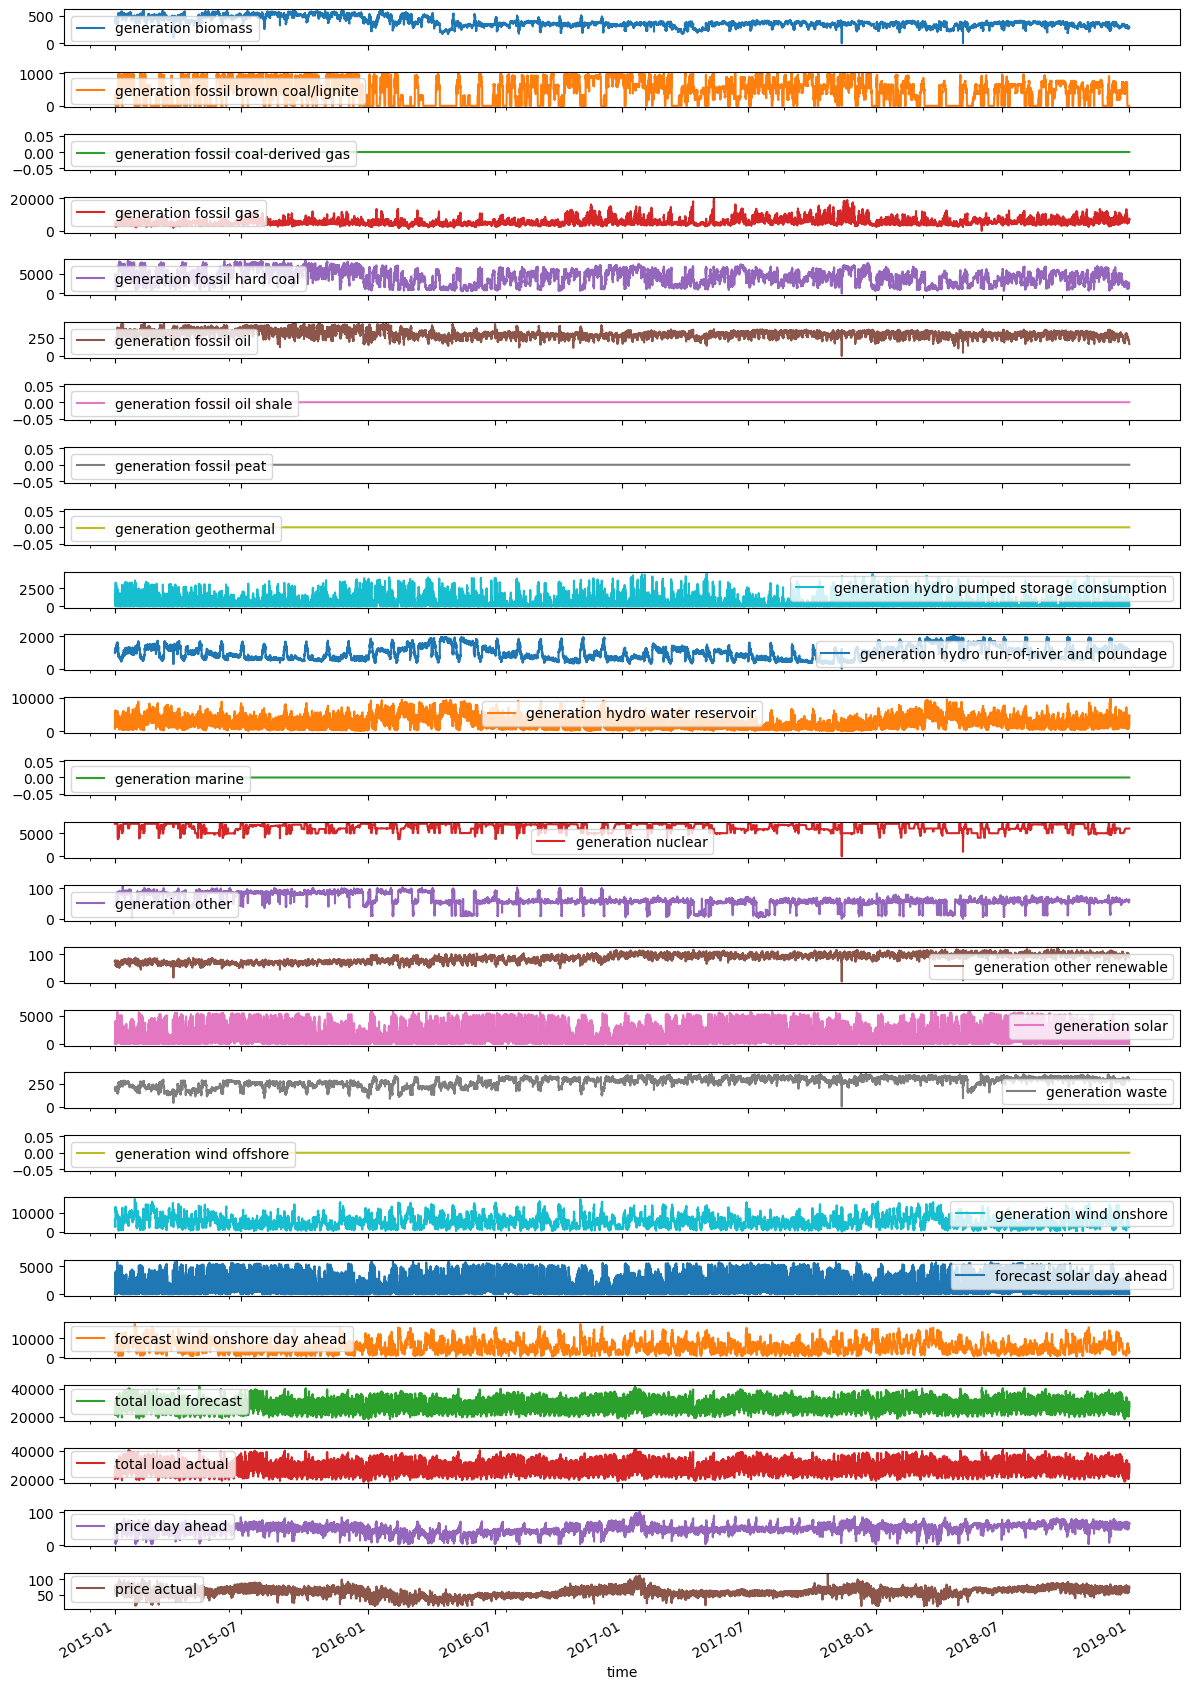

In [16]:
#visualizing the energy generation pattern on a highlevel for each energy source
energy_df.plot(figsize=(12,17),subplots=True);

Observation: Certain features in the dataset exhibit a single value across the entire time period under consideration. To delve deeper into this observation, it is advisable to examine the descriptive statistics of these columns. By analyzing the descriptive statistics, we can determine whether these columns genuinely have a constant value or if there exists some variability within a narrow range. This investigation will provide clarity regarding the nature of these features and their potential impact on the analysis.

In [17]:
energy_df.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
count,35017.000000,35017.000000,35017.0,35017.000000,35017.000000,35017.000000,35017.0,35017.0,35017.0,35017.000000,35017.000000,35017.000000,35017.0,35017.000000,35017.000000,35017.000000,35017.000000,35017.000000,35017.0,35017.000000,35017.000000,35017.000000,35017.000000,35017.000000,35017.000000,35017.000000
mean,383.529800,448.103207,0.0,5622.411829,4255.571694,298.333095,0.0,0.0,0.0,475.726047,972.090956,2604.536168,0.0,6264.056687,60.237256,85.651141,1433.093669,269.501299,0.0,5466.078048,1439.163064,5471.858926,28710.977697,28696.840078,49.869153,57.887179
std,85.304489,354.605379,0.0,2202.018147,1961.428697,52.470724,0.0,0.0,0.0,792.553651,400.753545,1834.944644,0.0,838.260925,20.236345,14.063909,1680.331016,50.143711,0.0,3213.624333,1677.872467,3176.482768,4592.401419,4574.238252,14.618269,14.190275
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,237.000000,18105.000000,18041.000000,2.060000,9.330000
25%,333.000000,0.000000,0.0,4126.000000,2527.000000,263.000000,0.0,0.0,0.0,0.000000,637.000000,1077.000000,0.0,5760.000000,53.000000,74.000000,71.000000,240.000000,0.0,2935.000000,69.000000,2980.000000,24795.000000,24808.000000,41.490000,49.360000
50%,367.000000,509.000000,0.0,4968.000000,4473.000000,300.000000,0.0,0.0,0.0,68.000000,906.000000,2164.000000,0.0,6564.000000,57.000000,88.000000,616.000000,279.000000,0.0,4850.000000,576.000000,4856.000000,28905.000000,28902.000000,50.510000,58.020000
75%,433.000000,757.000000,0.0,6428.000000,5837.000000,330.000000,0.0,0.0,0.0,616.000000,1250.000000,3755.000000,0.0,7024.000000,80.000000,97.000000,2579.000000,310.000000,0.0,7399.000000,2636.000000,7352.000000,32263.000000,32192.000000,60.530000,68.000000
max,592.000000,999.000000,0.0,20034.000000,8359.000000,449.000000,0.0,0.0,0.0,4523.000000,2000.000000,9728.000000,0.0,7117.000000,106.000000,119.000000,5792.000000,357.000000,0.0,17436.000000,5836.000000,17430.000000,41390.000000,41015.000000,101.990000,116.800000


Observation: Upon further analysis, our initial observation is validated, as certain columns exhibit a constant value of zero throughout the provided time period. This is substantiated by the descriptive statistics, which indicate a mean value of zero for these specific columns. The presence of a constant zero value in these columns suggests a consistent absence or lack of activity related to the corresponding variables during the analyzed time period.

In [18]:
# selecting columns with zero mean 
nil_cols=energy_df.describe().columns[energy_df.describe().loc['mean']==0]
nil_cols

Index(['generation fossil coal-derived gas', 'generation fossil oil shale',
       'generation fossil peat', 'generation geothermal', 'generation marine',
       'generation wind offshore'],
      dtype='object')

In [19]:
# dropping columns with zero mean
energy_df.drop(nil_cols,axis=1,inplace=True)

In [20]:
energy_df.shape

(35017, 20)

Six columns successfully dropped

Observation: The data description reveals that all generation sources have a minimum value of zero, implying that there are periods when no power was generated from any source. This aligns with our understanding of power generation dynamics. However, it is worth noting that if there exists a prolonged period during which no energy was generated by any of the sources, it might signify an anomaly that merits additional investigation. Such extended periods of zero generation could indicate potential issues or exceptional circumstances that should be explored to understand their underlying causes and potential impacts on the energy system.

In [21]:
energy_df.columns

Index(['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore',
       'forecast solar day ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual'],
      dtype='object')

In [22]:
(energy_df.mean(axis=1)==0).shape

(35017,)

In [23]:
gen_sources=energy_df.iloc[:,:-6].copy() # selecting data columns for energy generation sources
gen_sources[gen_sources.mean(axis=1)==0].shape[0] # filtering for when the generation value is 0 all through

0


Observation: Upon further analysis, it becomes evident that there are no instances or periods during the given time period where there was a complete absence of energy generation from all sources. Although specific sources may not have generated energy at certain points in time, other sources continued to contribute to the overall energy generation during those periods. Thus, we can confidently conclude that there was no complete absence of energy generation throughout the analyzed time period.

# Energy Generation Analysis

In [24]:
#total energy generated for the given period
Total_energy=gen_sources.sum().sum()

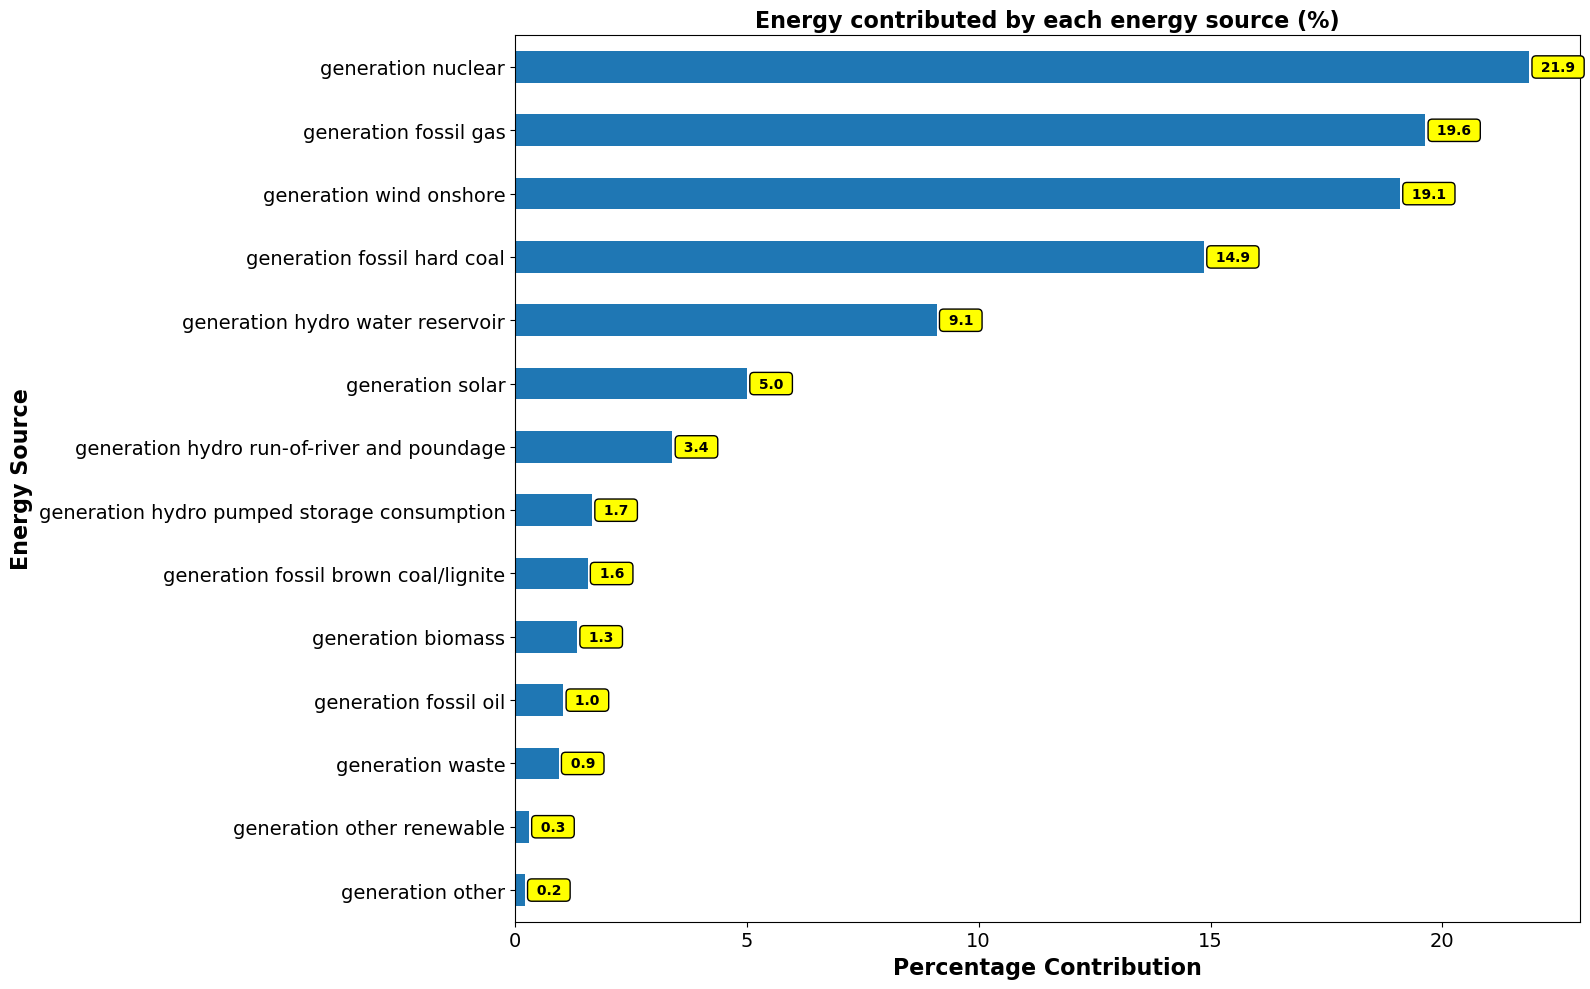

In [25]:
perc_= (gen_sources.sum() *100/Total_energy).sort_values(ascending=True)
ax=(gen_sources.sum() *100/Total_energy).sort_values(ascending=True).plot(kind='barh',figsize=(16,10))
# ax=gen_sources.sum().sort_values(ascending=True).plot(kind='barh',figsize=(12,7),
#                                                        title='Total energy contributed by each energy source')
for p in ax.patches:
    value = round(p.get_width(),1)
    ax.annotate(f' {value} ', (p.get_width(), p.get_y() + p.get_height() / 2),
                xytext=(5, 0), textcoords='offset points', ha='left', va='center',
                weight='bold', bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', edgecolor='black'))
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
ax.set_title('Energy contributed by each energy source (%)',fontsize=16, fontweight='bold')
ax.set_xlabel('Percentage Contribution',fontsize=16, fontweight='bold')
ax.set_ylabel('Energy Source',fontsize=16, fontweight='bold');

The analysis of the data reveals that Nuclear energy, Fossil gas, Wind, Coal, Hydro, and Solar energy are the primary contributors to Spain's energy production during the specified time period. These sources consistently play substantial roles in the country's energy generation. Their consistent presence and significant contributions highlight their importance in shaping Spain's energy mix and signify their ongoing significance as major sources of power production.

Let's proceed with analyzing the top six energy sources in Spain's energy mix during the given time period.

In [26]:
# top 6 energy sources
top_6=gen_sources.sum().sort_values(ascending=False).head(6).index
top_6

Index(['generation nuclear', 'generation fossil gas',
       'generation wind onshore', 'generation fossil hard coal',
       'generation hydro water reservoir', 'generation solar'],
      dtype='object')

## NUCLEAR ENERGY

Among the top six energy sources in Spain's energy mix during the specified time period, nuclear energy emerges as the leading contributor, accounting for approximately 22% of the total energy generation. This signifies the significant role played by nuclear power in the country's energy production, making it the primary source in terms of share. The substantial contribution of nuclear energy underscores its importance in meeting Spain's energy demands and highlights its position as a crucial pillar of the country's energy infrastructure.

### Generation over the years

Let's analyse the nuclear energy generation from 2015 - 2018

In [27]:
sources_pattern = gen_sources.copy()

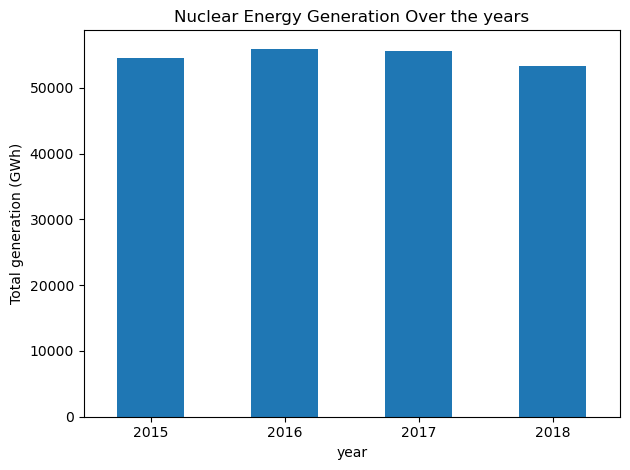

In [28]:
sources_pattern['year']=sources_pattern.index.year
nuclear = sources_pattern['generation nuclear'].copy()
yearly_total=(sources_pattern.groupby('year').sum()/10**3)['generation nuclear']
ax=yearly_total.plot(kind='bar')
plt.xticks(rotation=0)
ax.set_ylabel('Total generation (GWh)')
ax.set_title('Nuclear Energy Generation Over the years');
# yearly_total

Based on the provided visualization, it is evident that the nuclear energy generation in Spain remained relatively stable throughout the years 2015-2018. However, there was a notable peak in 2016, where the generation reached its highest point at approximately 56,000 GWh (gigawatt-hours) for that particular year.

### Average Monthly Pattern 

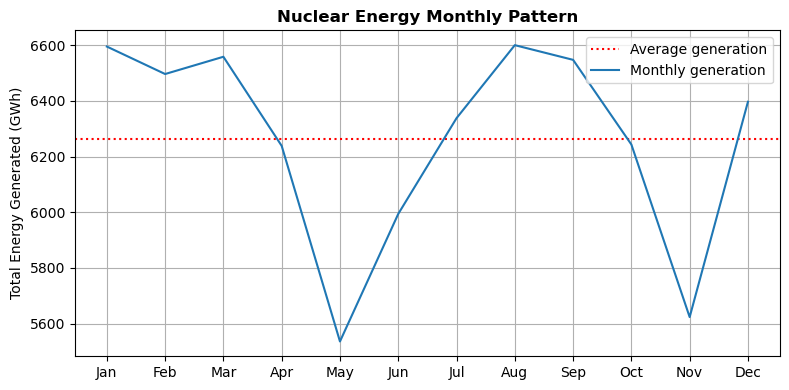

In [29]:
sources_pattern['month']= sources_pattern.index.strftime('%b')
avg_monthly_gen=sources_pattern.groupby('month', sort=False).mean()['generation nuclear']

# ax=avg_monthly_gen.plot() #check all the possible option when using pandas plot
plt.figure(figsize=(8,4))
plt.axhline(avg_monthly_gen.mean(), linestyle='dotted', color='red', label='Average generation')
plt.plot(avg_monthly_gen.index,avg_monthly_gen, label='Monthly generation')
plt.title('Nuclear Energy Monthly Pattern', fontweight='bold')
plt.ylabel('Total Energy Generated (GWh)')
plt.grid(True)
plt.legend(loc='upper right');

- The winter months (December to March) and the summer months (July to September) exhibit higher energy generation levels. This can be attributed to increased energy demand for heating during the winter months and cooling during the summer months, as well as potential higher industrial activities during these periods.

- On the other hand, energy generation is generally at its lowest during the spring months (April to June) and autumn months (October and November). This could be due to milder temperatures and lower energy demand for heating or cooling purposes.

- These observations indicate some seasonality patterns in energy generation, with higher levels during the winter and summer months and lower levels during the spring and autumn months.

### Hourly Generation Pattern

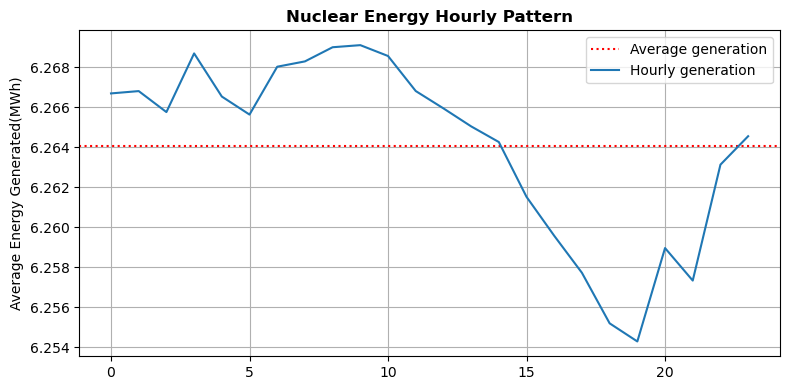

In [30]:
sources_pattern['hour']= sources_pattern.index.hour
avg_hourly_gen=(sources_pattern.groupby('hour').mean()/10**3)['generation nuclear']

# ax=avg_monthly_gen.plot() #check all the possible option when using pandas plot
plt.figure(figsize=(8,4))
plt.axhline(avg_hourly_gen.mean(), linestyle='dotted', color='red', label='Average generation')
plt.plot(avg_hourly_gen.index,avg_hourly_gen,label='Hourly generation')
plt.title('Nuclear Energy Hourly Pattern', fontweight='bold')
plt.ylabel('Average Energy Generated(MWh)')
plt.grid(True)
plt.legend(loc='upper right');
# plt.ylim(bottom=6220);

Energy generation tends to be higher during the daytime and lower during the nighttime.

This pattern aligns with the typical daily energy demand patterns in many regions, where energy consumption tends to be higher during the day due to factors such as industrial activities, residential energy use, and commercial operations. As a result, energy generation is generally higher during these peak demand periods to meet the increased energy needs.

Conversely, energy demand tends to be lower during the nighttime when activities and energy consumption decrease. Consequently, energy generation during this period is usually lower to match the reduced demand.

### Generation Pattern for the Days of the Week

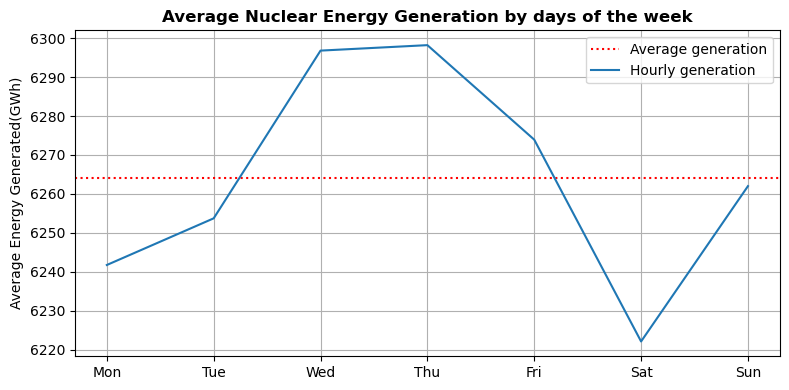

In [31]:
sources_pattern['days_of_week']=sources_pattern.index.strftime('%a')
sources_pattern['weekdays'] = sources_pattern.index.weekday

avg_weekday_gen=(sources_pattern.groupby('days_of_week').mean())[['generation nuclear','weekdays']].sort_values('weekdays')

plt.figure(figsize=(8,4))
plt.axhline(avg_weekday_gen['generation nuclear'].mean(), linestyle='dotted', color='red', label='Average generation')
plt.plot(avg_weekday_gen.index,avg_weekday_gen['generation nuclear'], label='Hourly generation')
plt.title('Average Nuclear Energy Generation by days of the week', fontweight='bold')
plt.ylabel('Average Energy Generated(GWh)')
plt.grid(True)
plt.legend(loc='upper right');
# plt.ylim(bottom=6220);

In [32]:
# gen_sources['total']=gen_sources.iloc[:,:-7].sum(axis=1)

It is observed that energy generation tends to peak during the mid-week and is below average during the weekends.

This pattern may be attributed to the different energy consumption behaviors between weekdays and weekends. On weekdays, there is typically higher energy demand due to various factors such as commercial and industrial activities, office operations, and increased household energy usage. Consequently, energy generation is higher to meet this elevated demand.

Conversely, during weekends, energy demand tends to be lower as a result of reduced commercial and industrial activities, decreased office usage, and potentially lower household energy consumption. Hence, energy generation is generally below average during these periods when the overall energy demand is comparatively lower.

### Max and Min Generation for the entire period

In [33]:
sources_pattern['day']=sources_pattern.index.day

In [34]:
max_gen_day=sources_pattern.loc[nuclear.idxmax()][['generation nuclear','year','month','days_of_week','day']]
max_gen_day

generation nuclear    7117.0
year                    2018
month                    Jan
days_of_week             Wed
day                       31
Name: 2018-01-31 22:00:00, dtype: object

In [35]:
min_gen_day = sources_pattern.loc[nuclear[nuclear>0].idxmin()][['generation nuclear','year','month','days_of_week','day']]
min_gen_day

generation nuclear    998.0
year                   2018
month                   May
days_of_week            Sun
day                       6
Name: 2018-05-06 12:00:00, dtype: object

## FOSSIL GAS 

Fossil gas or natural gas holds the position of the second-highest generating source in Spain during the specified time period. It contributes approximately 20% to the total energy generated in the country.

### Generation Over the years

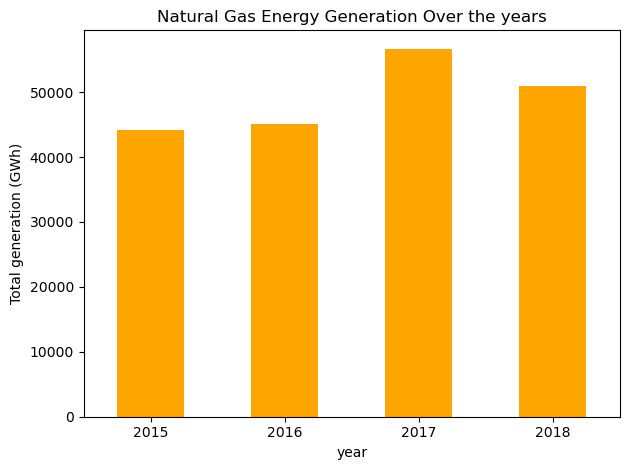

In [36]:
fossil_gas = sources_pattern['generation fossil gas']
# ax=(gen_sources.groupby('year').sum()/10**6)['generation nuclear'].plot(kind='bar')
yearly_total=(sources_pattern.groupby('year').sum()/10**3)['generation fossil gas']
ax=yearly_total.plot(kind='bar', color='orange')
plt.xticks(rotation=0)
ax.set_ylabel('Total generation (GWh)')
ax.set_title('Natural Gas Energy Generation Over the years');


It is observed that natural gas had the highest energy generation in Spain in the year 2017.

### Average Monthly Pattern

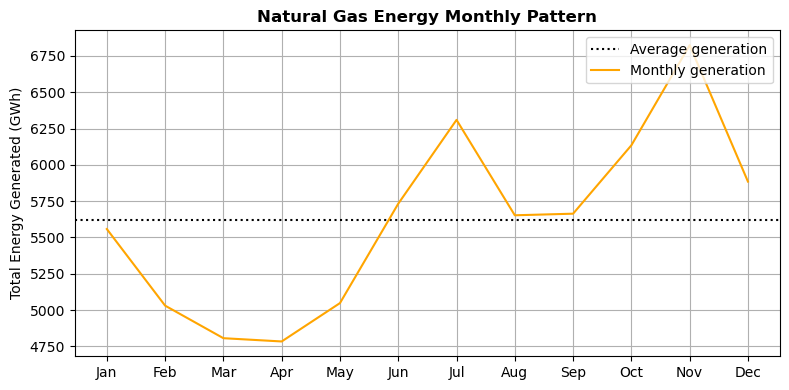

In [37]:
avg_monthly_gen=sources_pattern.groupby('month', sort=False).mean()['generation fossil gas']

# ax=avg_monthly_gen.plot() #check all the possible option when using pandas plot
plt.figure(figsize=(8,4))
plt.axhline(avg_monthly_gen.mean(), linestyle='dotted', color='black', label='Average generation')
plt.plot(avg_monthly_gen.index,avg_monthly_gen,color='orange', label='Monthly generation')
plt.title('Natural Gas Energy Monthly Pattern', fontweight='bold')
plt.ylabel('Total Energy Generated (GWh)')
plt.grid(True)
plt.legend(loc='upper right');

- Energy generated from natural gas is usually below average during the winter and spring season months. 
- A significant increase is noticed during the autumn months

### Hourly Generation Pattern

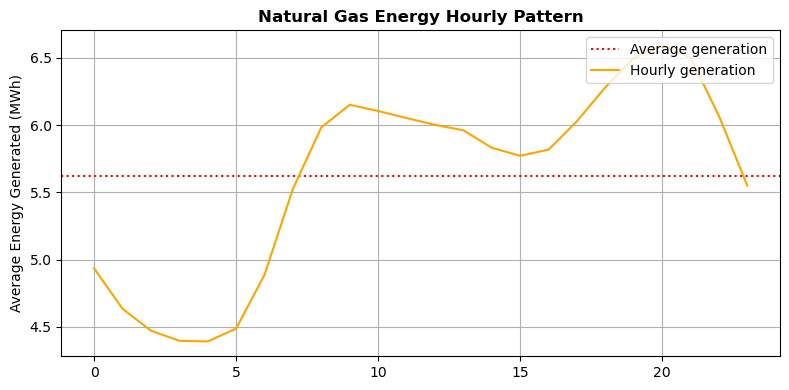

In [38]:
avg_hourly_gen=(sources_pattern.groupby('hour').mean()/10**3)['generation fossil gas']

# ax=avg_monthly_gen.plot() #check all the possible option when using pandas plot
plt.figure(figsize=(8,4))
plt.axhline(avg_hourly_gen.mean(), linestyle='dotted', color='red', label='Average generation')
plt.plot(avg_hourly_gen.index,avg_hourly_gen,color='orange', label='Hourly generation')
plt.title('Natural Gas Energy Hourly Pattern', fontweight='bold')
plt.ylabel('Average Energy Generated (MWh)')
plt.grid(True)
plt.legend(loc='upper right');
# plt.ylim(bottom=6220);

it is observed that hourly energy generation tends to be highest during the late time period, particularly peaking at 8:00pm. Conversely, energy generation during the early periods is usually below average.

### Generation Pattern for the Days of the Week

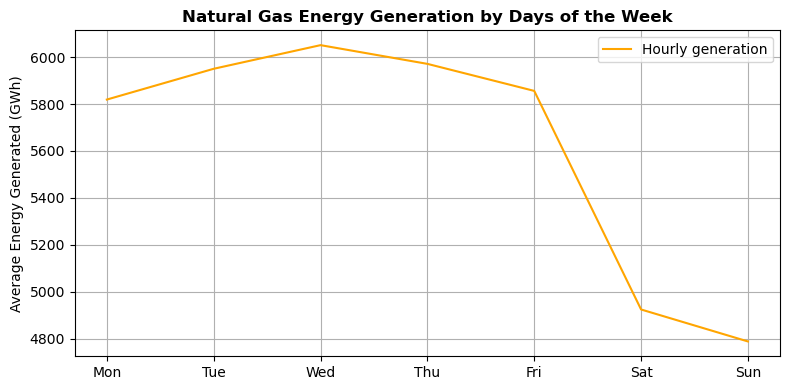

In [39]:
sources_pattern['weekdays'] = sources_pattern.index.weekday

avg_weekday_gen=sources_pattern.groupby('days_of_week').mean()[['generation fossil gas','weekdays']].sort_values('weekdays')

plt.figure(figsize=(8,4))
# plt.axhline(avg_weekday_gen['generation nuclear'].mean(), linestyle='dotted', color='red', label='Average generation')
plt.plot(avg_weekday_gen.index,avg_weekday_gen['generation fossil gas'],color='orange', label='Hourly generation')
plt.title('Natural Gas Energy Generation by Days of the Week', fontweight='bold')
plt.ylabel('Average Energy Generated (GWh)')
plt.grid(True)
plt.legend(loc='upper right');
# plt.ylim(bottom=6220);

There is a fairly consistent amount of generation throughout the weekdays, indicating a relatively stable demand for energy during these days. However, a significant drop in energy generation is observed during the weekends. 
This pattern suggests that industries or commercial sectors, which may be the major users of natural gas energy, contribute significantly to the overall demand and generation during weekdays. On the other hand, reduced industrial activities or lower energy demands during weekends result in decreased natural gas energy generation.

### Max and Min Generation for the entire period

In [40]:
max_gen_day=sources_pattern.loc[fossil_gas.idxmax()][['generation fossil gas','year','month','days_of_week','day']]
max_gen_day

generation fossil gas    20034.0
year                        2017
month                        May
days_of_week                 Fri
day                           12
Name: 2017-05-12 18:00:00, dtype: object

In [41]:
min_gen_day=sources_pattern.loc[fossil_gas[fossil_gas>0].idxmin()][['generation fossil gas','year','month','days_of_week','day']]
min_gen_day

generation fossil gas    1518.0
year                       2016
month                       Feb
days_of_week                Sun
day                          28
Name: 2016-02-28 04:00:00, dtype: object

## WIND ENERGY

Wind energy emerges as the third-highest contributing energy source in Spain's energy mix during the given time period, accounting for approximately 19% of the total energy generation. Furthermore, it holds the position as the top renewable energy source in terms of contribution.

### Generation over the years 

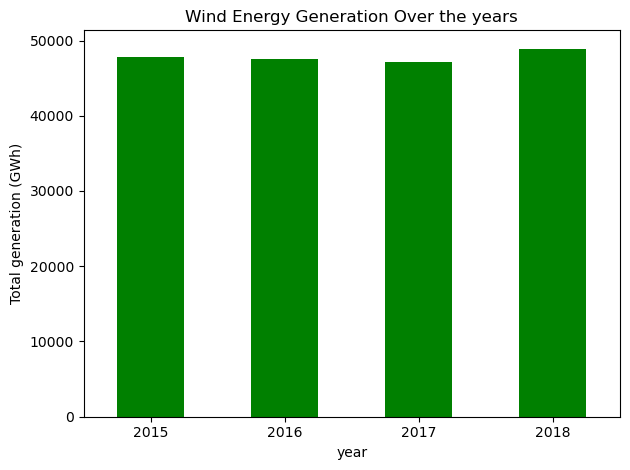

In [42]:
wind = sources_pattern['generation wind onshore']
# ax=(gen_sources.groupby('year').sum()/10**6)['generation nuclear'].plot(kind='bar')
yearly_total=(sources_pattern.groupby('year').sum()/10**3)['generation wind onshore']
ax=yearly_total.plot(kind='bar', color='green')
plt.xticks(rotation=0)
ax.set_ylabel('Total generation (GWh)')
ax.set_title('Wind Energy Generation Over the years');

It is observed that wind energy generation has remained relatively constant within the given time period.

### Average Monthly Pattern

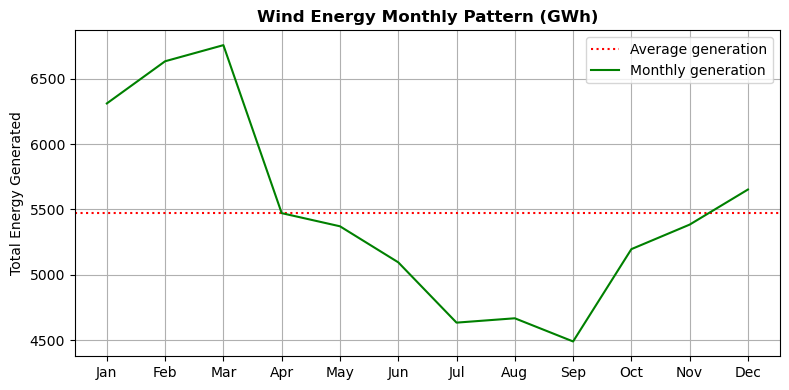

In [43]:
avg_monthly_gen=sources_pattern.groupby('month', sort=False).mean()['generation wind onshore']

# ax=avg_monthly_gen.plot() #check all the possible option when using pandas plot
plt.figure(figsize=(8,4))
plt.axhline(avg_monthly_gen.mean(), linestyle='dotted', color='red', label='Average generation')
plt.plot(avg_monthly_gen.index,avg_monthly_gen,color='green', label='Monthly generation')
plt.title('Wind Energy Monthly Pattern (GWh)', fontweight='bold')
plt.ylabel('Total Energy Generated')
plt.grid(True)
plt.legend(loc='upper right');

it is evident that a significant percentage of energy generation from wind sources in Spain occurs during the winter months.

This observation aligns with the general characteristics of wind patterns in many regions. Winter months often experience stronger and more consistent winds due to weather patterns and temperature differentials. These favorable wind conditions during winter enhance the potential for higher wind energy generation.

### Hourly Generation Pattern

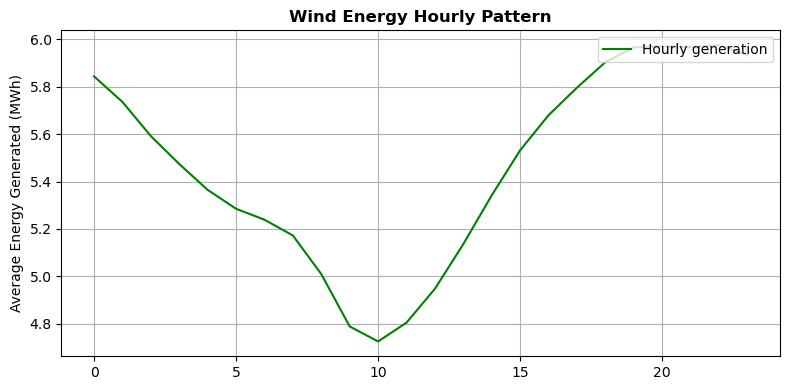

In [44]:
avg_hourly_gen=(sources_pattern.groupby('hour').mean()/10**3)['generation wind onshore']

# ax=avg_monthly_gen.plot() #check all the possible option when using pandas plot
plt.figure(figsize=(8,4))
# plt.axhline(avg_hourly_gen.mean(), linestyle='dotted', color='red', label='Average generation')
plt.plot(avg_hourly_gen.index,avg_hourly_gen,color='green', label='Hourly generation')
plt.title('Wind Energy Hourly Pattern', fontweight='bold')
plt.ylabel('Average Energy Generated (MWh)')
plt.grid(True)
plt.legend(loc='upper right');
# plt.ylim(bottom=6220);

It is observed that wind energy generation follows a specific pattern throughout the day. The generation starts dropping from late night until late morning, after which it begins to rise again until it reaches its peak at night.

This pattern reflects the diurnal variations in wind conditions and subsequent wind energy generation. During the late night and early morning hours, wind speeds tend to be relatively lower, resulting in decreased wind energy generation. As the day progresses, wind speeds typically increase, leading to higher wind energy generation.

The rise in wind energy generation from late morning until it peaks at night suggests that the afternoon and evening hours experience more favorable wind conditions for energy production. These periods may be influenced by factors such as temperature differentials, land-sea breezes, or other local wind patterns that enhance wind speeds and promote higher wind energy generation.

### Daily Pattern

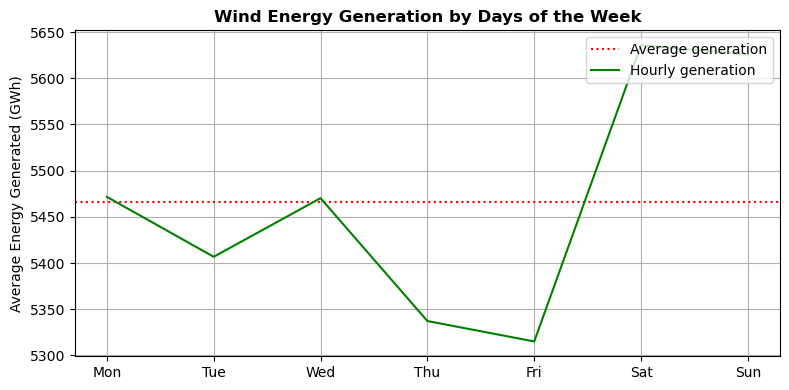

In [45]:
avg_weekday_gen=sources_pattern.groupby('days_of_week').mean()[['generation wind onshore','weekdays']].sort_values('weekdays')

plt.figure(figsize=(8,4))
plt.axhline(avg_weekday_gen['generation wind onshore'].mean(), linestyle='dotted', color='red', label='Average generation')
plt.plot(avg_weekday_gen.index,avg_weekday_gen['generation wind onshore'],color='green', label='Hourly generation')
plt.title('Wind Energy Generation by Days of the Week', fontweight='bold')
plt.ylabel('Average Energy Generated (GWh)')
plt.grid(True)
plt.legend(loc='upper right');
# plt.ylim(bottom=6220);

It is observed that wind energy generation is typically at its highest during the weekends.

### Max and Min Generation for the entire Period

In [46]:
max_gen_day=sources_pattern.loc[wind.idxmax()][['generation wind onshore','year','month','days_of_week','day']]
max_gen_day

generation wind onshore    17436.0
year                          2015
month                          Jan
days_of_week                   Thu
day                             29
Name: 2015-01-29 19:00:00, dtype: object

In [47]:
max_gen_day=sources_pattern.loc[wind[wind>0].idxmin()][['generation wind onshore','year','month','days_of_week','day']]
max_gen_day

generation wind onshore    234.0
year                        2015
month                        Nov
days_of_week                 Wed
day                           11
Name: 2015-11-11 15:00:00, dtype: object

## COAL

Coal is the fourth largest source of energy generation in Spain, contributing approximately 15% to the total energy generated. Additionally, it stands as the second largest source of fossil fuel after natural gas

The significant contribution of coal to the energy mix highlights its historical role in power generation and its status as a conventional fossil fuel source. However, it is worth noting that coal is considered one of the more carbon-intensive and environmentally impactful sources of energy.

The comparatively high percentage of energy generation from coal within the fossil fuel category emphasizes the importance of transitioning to cleaner and more sustainable energy sources

## Generation Over the years

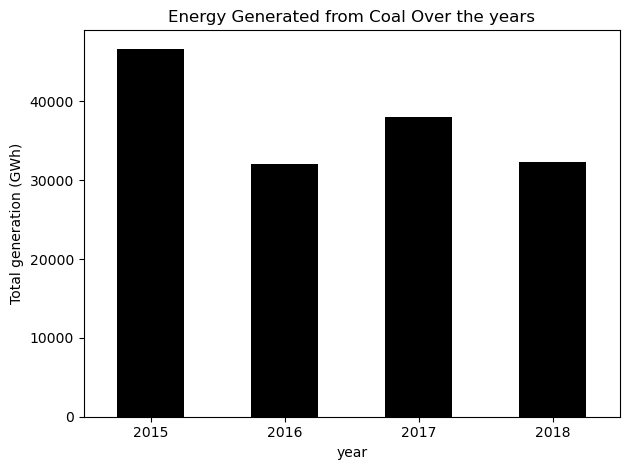

In [48]:
coal = sources_pattern['generation fossil hard coal']
# ax=(gen_sources.groupby('year').sum()/10**6)['generation nuclear'].plot(kind='bar')
yearly_total=(sources_pattern.groupby('year').sum()/10**3)['generation fossil hard coal']
ax=yearly_total.plot(kind='bar', color = 'black')
plt.xticks(rotation=0)
ax.set_ylabel('Total generation (GWh)')
ax.set_title('Energy Generated from Coal Over the years');

The analysis of the data reveals that energy generation from coal has experienced a significant drop since 2015. However, there was a notable spike in 2017.

This decline in energy generation from coal aligns with global trends and efforts to reduce reliance on coal due to its environmental impact, including high carbon emissions and air pollution.

The spike in energy generation from coal in 2017 suggests that there may have been specific circumstances or temporary factors that led to increased coal usage during that year. Further investigation would be required to identify the underlying reasons behind this spike.

### Monthly Pattern

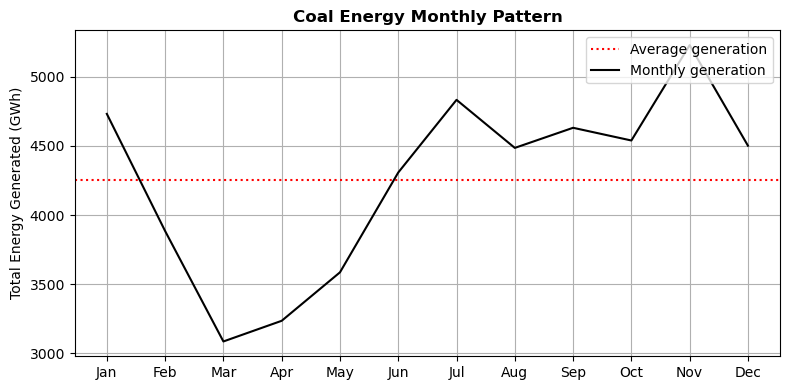

In [49]:
avg_monthly_gen=sources_pattern.groupby('month', sort=False).mean()['generation fossil hard coal']

# ax=avg_monthly_gen.plot() #check all the possible option when using pandas plot
plt.figure(figsize=(8,4))
plt.axhline(avg_monthly_gen.mean(), linestyle='dotted', color='red', label='Average generation')
plt.plot(avg_monthly_gen.index,avg_monthly_gen,color='black', label='Monthly generation')
plt.title('Coal Energy Monthly Pattern', fontweight='bold')
plt.ylabel('Total Energy Generated (GWh)')
plt.grid(True)
plt.legend(loc='upper right');

This reveals a similar pattern in energy generation from coal as observed for natural gas. Energy generated from coal exhibits lower levels during the winter months and spring seasons, while higher generation occurs during the summer and autumn seasons.

### Hourly Generation Pattern

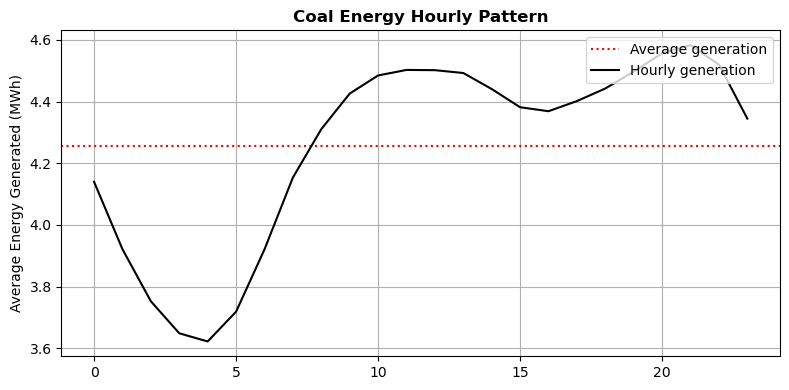

In [50]:
avg_hourly_gen=(sources_pattern.groupby('hour').mean()/10**3)['generation fossil hard coal']

# ax=avg_monthly_gen.plot() #check all the possible option when using pandas plot
plt.figure(figsize=(8,4))
plt.axhline(avg_hourly_gen.mean(), linestyle='dotted', color='red', label='Average generation')
plt.plot(avg_hourly_gen.index,avg_hourly_gen,color='black', label='Hourly generation')
plt.title('Coal Energy Hourly Pattern', fontweight='bold')
plt.ylabel('Average Energy Generated (MWh)')
plt.grid(True)
plt.legend(loc='upper right');
# plt.ylim(bottom=6220);

It is interesting to note that coal exhibits a similar hourly generation pattern to that of natural gas. The generation from coal tends to be low in the early morning hours and gradually increases throughout the day until it reaches a peak, after which it starts to decline.

This pattern aligns with the overall energy demand patterns and usage trends observed throughout the day. During the early morning hours, energy demand tends to be lower as industrial and commercial activities are typically reduced, and household energy consumption is relatively minimal.

### Daily Pattern

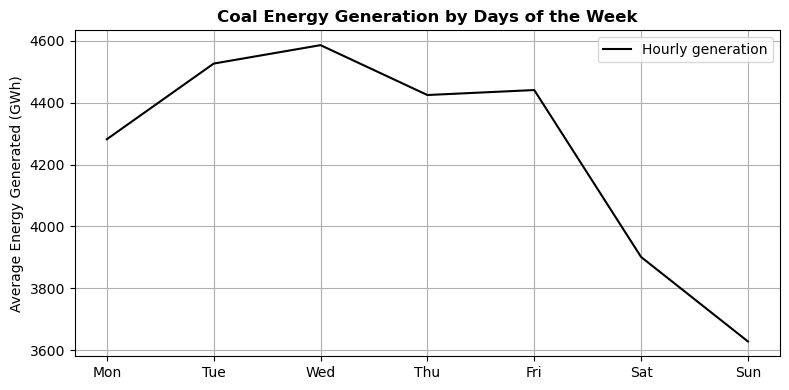

In [51]:
avg_weekday_gen=sources_pattern.groupby('days_of_week').mean()[['generation fossil hard coal','weekdays']].sort_values('weekdays')

plt.figure(figsize=(8,4))
# plt.axhline(avg_weekday_gen['generation nuclear'].mean(), linestyle='dotted', color='red', label='Average generation')
plt.plot(avg_weekday_gen.index,avg_weekday_gen['generation fossil hard coal'],color='black', label='Hourly generation')
plt.title('Coal Energy Generation by Days of the Week', fontweight='bold')
plt.ylabel('Average Energy Generated (GWh)')
plt.grid(True)
plt.legend(loc='upper right');
# plt.ylim(bottom=6220);

Another interesting observation is that coal energy generation is typically at its lowest during the weekends.

The lower coal energy generation during weekends can be attributed to reduced industrial and commercial activities, as many businesses and industries may operate at a lower capacity or shut down during weekends. Consequently, the energy demand from these sectors decreases, resulting in a reduced need for coal energy generation.

### Min and Max Generation for the entire period

In [52]:
max_gen_day=sources_pattern.loc[coal.idxmax()][['generation fossil hard coal','year','month','days_of_week','day']]
max_gen_day

generation fossil hard coal    8359.0
year                             2015
month                             Oct
days_of_week                      Fri
day                                 2
Name: 2015-10-02 21:00:00, dtype: object

In [53]:
min_gen_day=sources_pattern.loc[coal[coal>0].idxmin()][['generation fossil hard coal','year','month','days_of_week','day']]
min_gen_day

generation fossil hard coal    576.0
year                            2016
month                            May
days_of_week                     Mon
day                               16
Name: 2016-05-16 02:00:00, dtype: object

Based on the hourly and monthly patterns observed in fossil energy generation, a notable trend emerges suggesting that fossil energy, including coal and natural gas, is primarily used in workplaces or commercial settings.

The hourly patterns indicate that energy generation from fossil fuels, such as coal and natural gas, tends to be lower during the early morning hours, which aligns with reduced energy demand in residential areas during that time. As the day progresses, energy generation increases, potentially indicating the start of industrial and commercial activities where fossil fuel energy sources are utilized.

The monthly patterns also show that energy generation from fossil fuels tends to be higher during the winter months and seasons associated with increased energy consumption in workplaces. This further supports the notion that fossil energy is predominantly used in workplaces, where heating, manufacturing, and other industrial processes require significant energy inputs.

These observations imply that energy consumption from fossil fuels is closely tied to industrial and commercial sectors, while residential energy consumption may have a relatively smaller share in the overall fossil energy usage.

## HYDRO ENERGY

Energy generated from water reservoirs also known as hydro electric power ranks fifth in Spain's energy mix, contributing approximately 9% to the total energy generation.

### Energy Generation Over the years

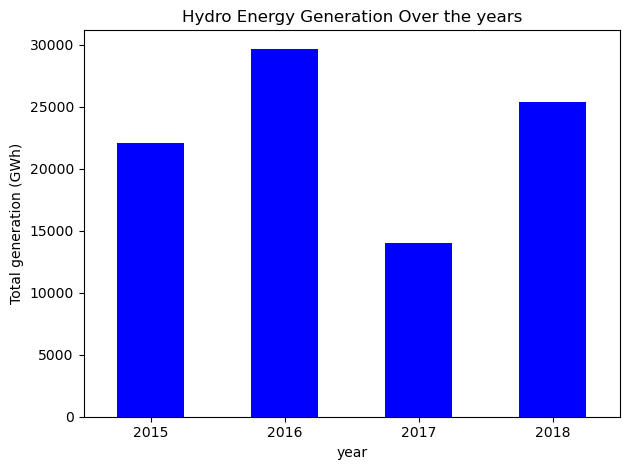

In [54]:
hydro = sources_pattern['generation hydro water reservoir']
# ax=(gen_sources.groupby('year').sum()/10**6)['generation nuclear'].plot(kind='bar')
yearly_total=(sources_pattern.groupby('year').sum()/10**3)['generation hydro water reservoir']
ax=yearly_total.plot(kind='bar', color='blue')
plt.xticks(rotation=0)
ax.set_ylabel('Total generation (GWh)')
ax.set_title('Hydro Energy Generation Over the years');

This reveals a dwindling generation pattern for hydro energy, with its highest generation occurring in 2016, followed by a drastic reduction in 2017.

The significant drop in hydro energy generation from 2016 to 2017 suggests a notable change in the factors influencing hydroelectric power production during that period

Further investigation into these factors can help identify the drivers of the observed changes and provide insights for improving the resilience and efficiency of hydroelectric power generation.

### Monthly Pattern

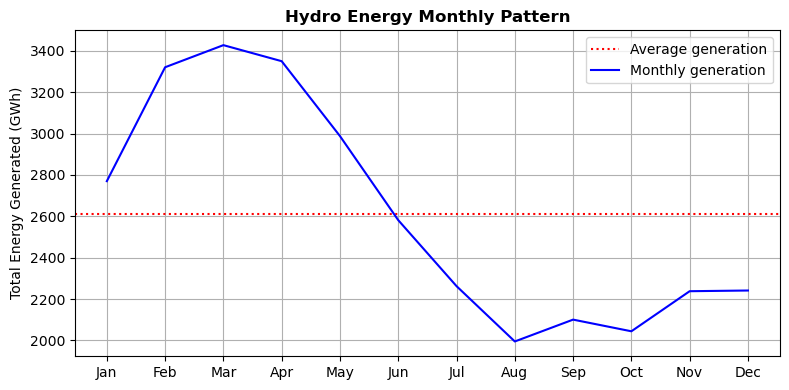

In [55]:
avg_monthly_gen=sources_pattern.groupby('month', sort=False).mean()['generation hydro water reservoir']

# ax=avg_monthly_gen.plot() #check all the possible option when using pandas plot
plt.figure(figsize=(8,4))
plt.axhline(avg_monthly_gen.mean(), linestyle='dotted', color='red', label='Average generation')
plt.plot(avg_monthly_gen.index,avg_monthly_gen,color='blue', label='Monthly generation')
plt.title('Hydro Energy Monthly Pattern', fontweight='bold')
plt.ylabel('Total Energy Generated (GWh)')
plt.grid(True)
plt.legend(loc='upper right');

Generation from water reservoirs seems to be the highest dueing winter. The amount generated keeps dropping through spring and it becomes below average from summer through autumn

### Hourly Generation Pattern 

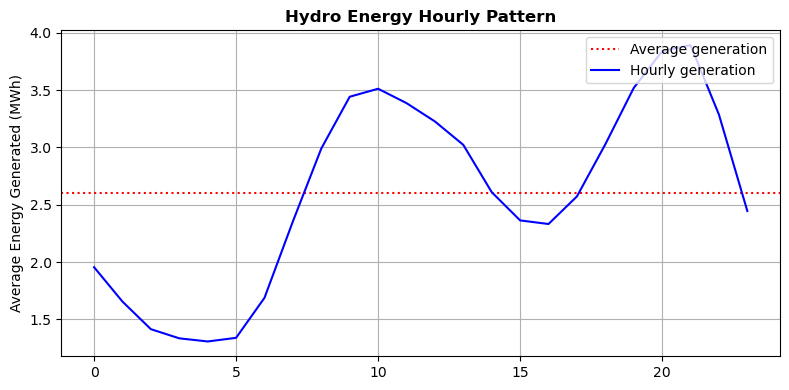

In [56]:
avg_hourly_gen=(sources_pattern.groupby('hour').mean()/10**3)['generation hydro water reservoir']

# ax=avg_monthly_gen.plot() #check all the possible option when using pandas plot
plt.figure(figsize=(8,4))
plt.axhline(avg_hourly_gen.mean(), linestyle='dotted', color='red', label='Average generation')
plt.plot(avg_hourly_gen.index,avg_hourly_gen,color='blue', label='Hourly generation')
plt.title('Hydro Energy Hourly Pattern', fontweight='bold')
plt.ylabel('Average Energy Generated (MWh)')
plt.grid(True)
plt.legend(loc='upper right');
# plt.ylim(bottom=6220);

Energy from hydro is usually low in the early morning. Above average during the day but drops below average from 3-5pm then increases again till it peaks at 9 pm and drops throughout the night

### Daily Pattern

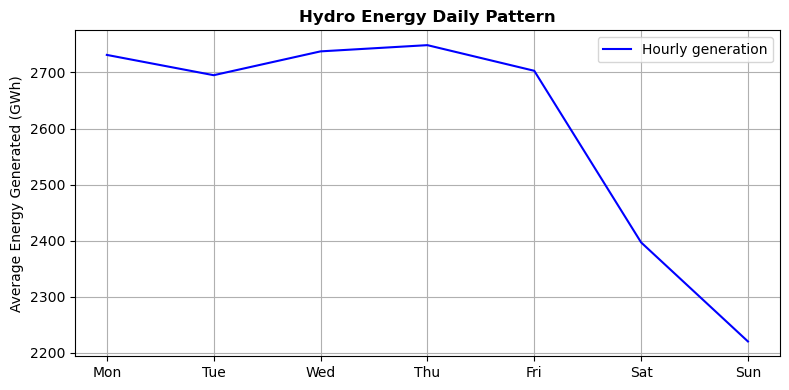

In [57]:
avg_weekday_gen=sources_pattern.groupby('days_of_week').mean()[['generation hydro water reservoir','weekdays']].sort_values('weekdays')

plt.figure(figsize=(8,4))
# plt.axhline(avg_weekday_gen['generation nuclear'].mean(), linestyle='dotted', color='red', label='Average generation')
plt.plot(avg_weekday_gen.index,avg_weekday_gen['generation hydro water reservoir'],color='blue', label='Hourly generation')
plt.title('Hydro Energy Daily Pattern', fontweight='bold')
plt.ylabel('Average Energy Generated (GWh)')
plt.grid(True)
plt.legend(loc='upper right');
# plt.ylim(bottom=6220);

Energy generation from hydro sources remains quite constant during the weekdays but drops significantly during the weekends.

### Min and Max Generation for the entire period

In [58]:
max_gen_day=sources_pattern.loc[hydro.idxmax()][['generation hydro water reservoir','year','month','days_of_week','day']]
max_gen_day

generation hydro water reservoir    9728.0
year                                  2018
month                                  Dec
days_of_week                           Tue
day                                      4
Name: 2018-12-04 21:00:00, dtype: object

In [59]:
min_gen_day=sources_pattern.loc[hydro[hydro>0].idxmin()][['generation hydro water reservoir','year','month','days_of_week','day']]
min_gen_day

generation hydro water reservoir    134.0
year                                 2017
month                                 Nov
days_of_week                          Sun
day                                    26
Name: 2017-11-26 05:00:00, dtype: object

## SOLAR ENERGY

Solar energy ranks sixth in Spain's energy mix, contributing approximately 5% to the total energy generation.

### Energy generation Over the years

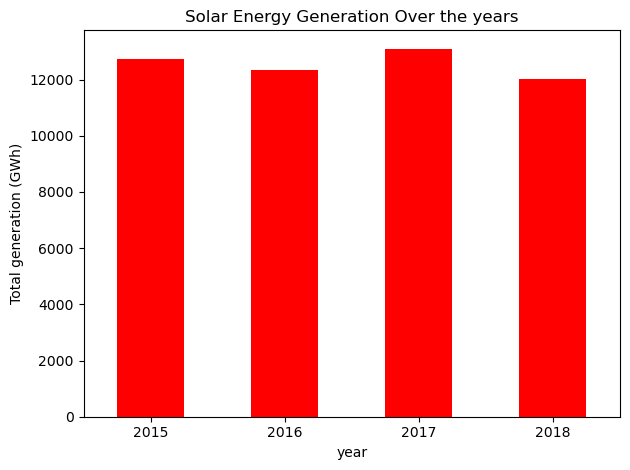

In [60]:
hydro = sources_pattern['generation solar']
# ax=(gen_sources.groupby('year').sum()/10**6)['generation nuclear'].plot(kind='bar')
yearly_total=(sources_pattern.groupby('year').sum()/10**3)['generation solar']
ax=yearly_total.plot(kind='bar', color='red')
plt.xticks(rotation=0)
ax.set_ylabel('Total generation (GWh)')
ax.set_title('Solar Energy Generation Over the years');

It is observed that solar energy generation has been relatively constant over the years, with a slight increase noticed in 2017.

The slight increase in solar energy generation in 2017 suggests a potential expansion or improvement in solar infrastructure during that year.

### Monthly Pattern

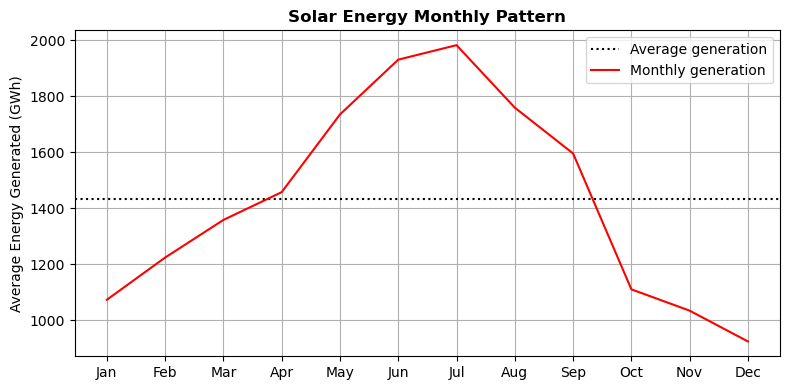

In [61]:
avg_monthly_gen=sources_pattern.groupby('month', sort=False).mean()['generation solar']

# ax=avg_monthly_gen.plot() #check all the possible option when using pandas plot
plt.figure(figsize=(8,4))
plt.axhline(avg_monthly_gen.mean(), linestyle='dotted', color='black', label='Average generation')
plt.plot(avg_monthly_gen.index,avg_monthly_gen,color='red', label='Monthly generation')
plt.title('Solar Energy Monthly Pattern', fontweight='bold')
plt.ylabel('Average Energy Generated (GWh)')
plt.grid(True)
plt.legend(loc='upper right');

Solar energy generation is at its highest during the summer months and below average during the winter and autumn seasons. This pattern aligns with the expected variations in sunlight availability throughout the year.

### Hourly Pattern

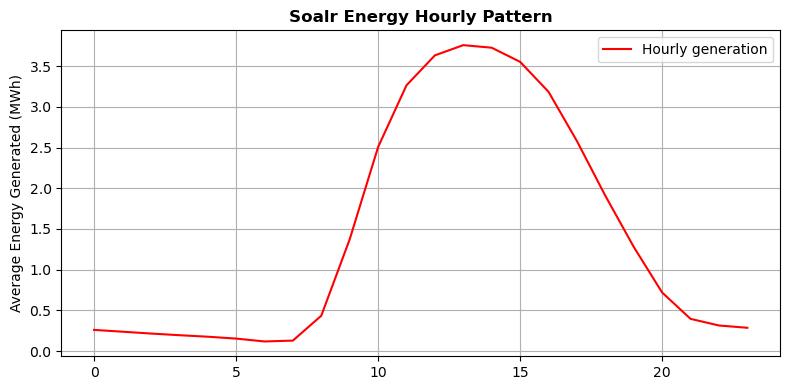

In [62]:
avg_hourly_gen=(sources_pattern.groupby('hour').mean()/10**3)['generation solar']

# ax=avg_monthly_gen.plot() #check all the possible option when using pandas plot
plt.figure(figsize=(8,4))
# plt.axhline(avg_hourly_gen.mean(), linestyle='dotted', color='red', label='Average generation')
plt.plot(avg_hourly_gen.index,avg_hourly_gen,color='red', label='Hourly generation')
plt.title('Soalr Energy Hourly Pattern', fontweight='bold')
plt.ylabel('Average Energy Generated (MWh)')
plt.grid(True)
plt.legend(loc='upper right');
# plt.ylim(bottom=6220);

The analysis of the data indicates that solar energy generation is mostly concentrated during the day, as reflected in the hourly generation patterns.

Solar energy generation relies on the availability of sunlight, and it is highest when the sun is at its peak intensity, typically during daylight hours. This is evident from the data, which shows higher solar energy generation during the day compared to nighttime.

### Daily Pattern

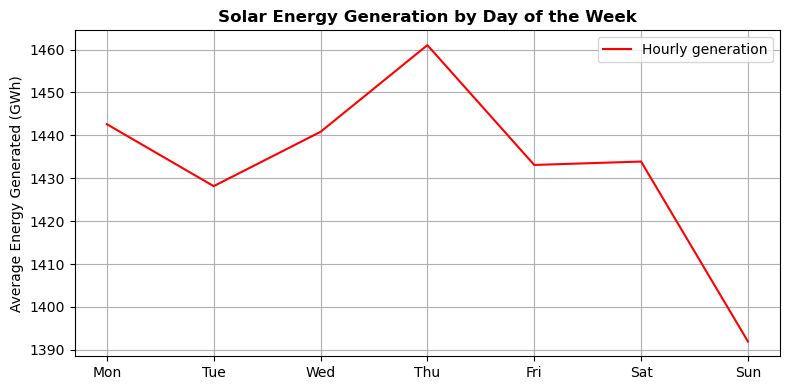

In [63]:
avg_weekday_gen=sources_pattern.groupby('days_of_week').mean()[['generation solar','weekdays']].sort_values('weekdays')

plt.figure(figsize=(8,4))
# plt.axhline(avg_weekday_gen['generation nuclear'].mean(), linestyle='dotted', color='red', label='Average generation')
plt.plot(avg_weekday_gen.index,avg_weekday_gen['generation solar'],color='red', label='Hourly generation')
plt.title('Solar Energy Generation by Day of the Week', fontweight='bold')
plt.ylabel('Average Energy Generated (GWh)')
plt.grid(True)
plt.legend(loc='upper right');
# plt.ylim(bottom=6220);

It is observed that solar energy generation peaks on Thursdays and is at its lowest on Sundays. This pattern suggests that Thursdays are typically associated with higher sunlight availability, while Sundays tend to have lower sunlight availability.

### Min and Max Generation for the entire period

In [64]:
max_gen_day=sources_pattern.loc[hydro.idxmax()][['generation solar','year','month','days_of_week','day']]
max_gen_day

generation solar    5792.0
year                  2016
month                  Feb
days_of_week           Fri
day                      5
Name: 2016-02-05 14:00:00, dtype: object

In [65]:
min_gen_day=sources_pattern.loc[hydro[hydro>0].idxmin()][['generation solar','year','month','days_of_week','day']]
min_gen_day

generation solar     2.0
year                2018
month                Feb
days_of_week         Sat
day                   10
Name: 2018-02-10 05:00:00, dtype: object

Let's explore the different energy sources in aggregation to gain a holistic understanding of their overall contributions to the energy mix in Spain during the given time period.

By examining their cumulative values, we can analyze their relative significance and identify any trends or changes in their contributions over time. This analysis will provide insights into the overall energy landscape in Spain and the role played by different energy sources.

In [66]:
renewables=['generation biomass', 
            'generation hydro pumped storage consumption',
           'generation hydro run-of-river and poundage',
           'generation hydro water reservoir', 
            'generation other renewable',
            'generation solar',
           'generation waste', 
           'generation wind onshore']



fossils = ['generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil',]

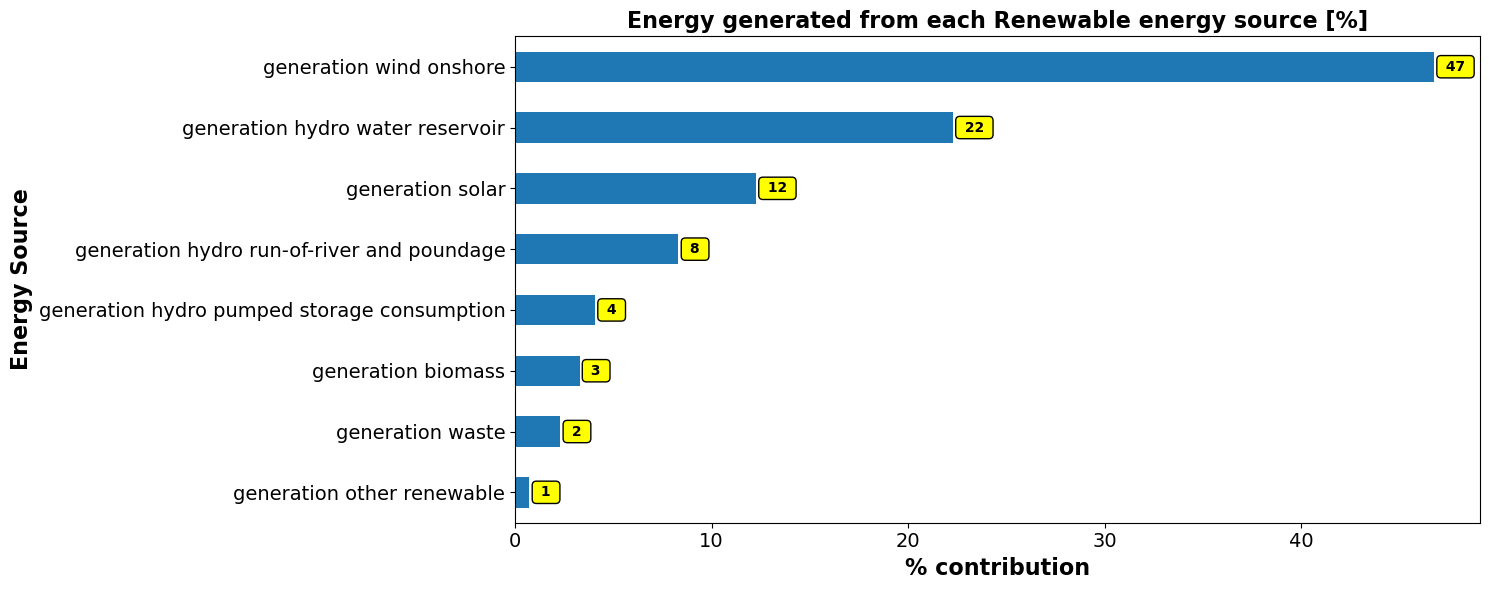

In [67]:
renewable_sources = gen_sources[renewables]

total_renewable = renewable_sources.sum().sum()


ax=(renewable_sources.sum()*100/total_renewable).sort_values(ascending=True).plot(kind='barh',figsize=(15,6))

for p in ax.patches:
    value = round(p.get_width())
    ax.annotate(f' {value} ', (p.get_width(), p.get_y() + p.get_height() / 2),
                xytext=(5, 0), textcoords='offset points', ha='left', va='center',
                weight='bold', bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', edgecolor='black'))

    
# for p in ax.patches:
#     ax.annotate(str(p.get_width()), (p.get_x() + p.get_height() / 2., p.get_width()),
#                 va='center', xytext=(0, 5), textcoords='offset points')


plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
ax.set_title('Energy generated from each Renewable energy source [%]',fontsize=16, fontweight='bold')
ax.set_xlabel('% contribution',fontsize=16, fontweight='bold')
ax.set_ylabel('Energy Source', fontsize=16, fontweight='bold');

Observation: Upon analyzing the renewable energy sources in Spain, it is evident that the major contributor is wind energy, contributing 47% of the total renewable energy generation. It is followed by hydro power and solar energy. Wind energy has the highest contribution among the renewable sources, indicating its significant role in the country's renewable energy generation. Hydro power ranks second in terms of contribution, while solar energy comes third. This highlights the importance of wind energy as the primary renewable energy source in Spain during the given time period.

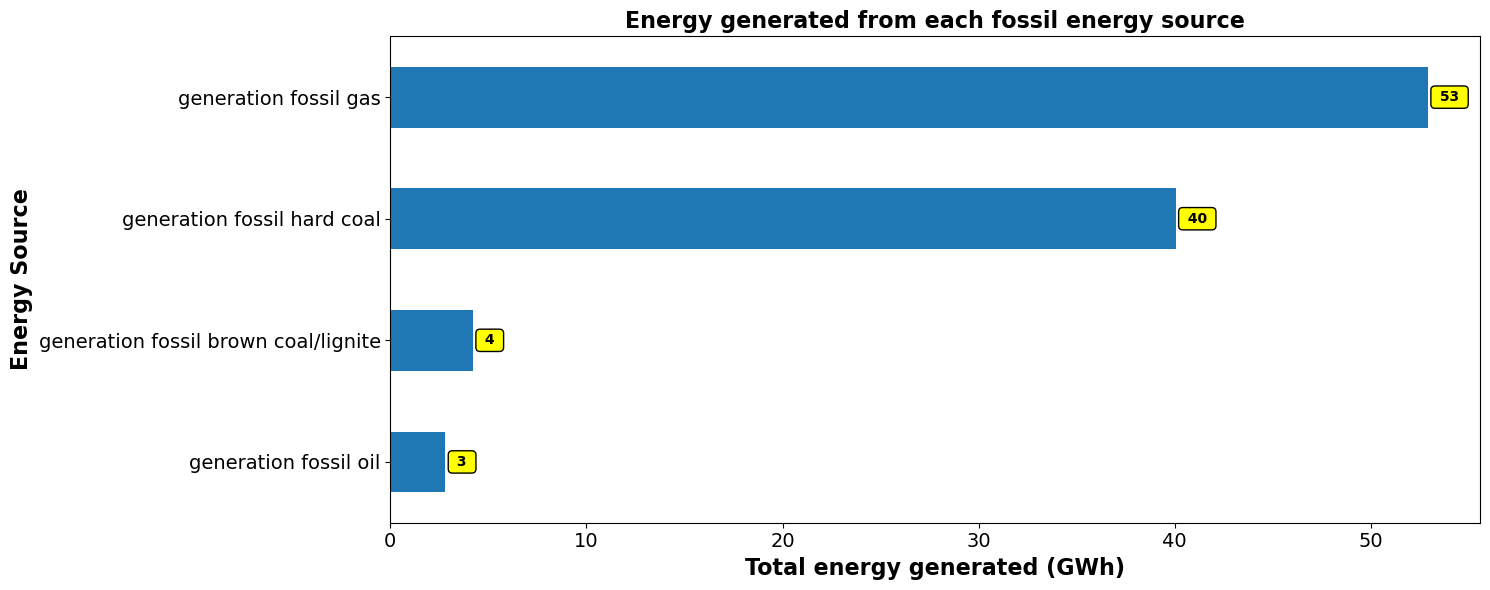

In [68]:
fossil_sources = gen_sources[fossils]

total_fossil = fossil_sources.sum().sum()


ax=(fossil_sources.sum()*100/total_fossil).sort_values(ascending=True).plot(kind='barh',figsize=(15,6))

for p in ax.patches:
    value = round(p.get_width())
    ax.annotate(f' {value} ', (p.get_width(), p.get_y() + p.get_height() / 2),
                xytext=(5, 0), textcoords='offset points', ha='left', va='center',
                weight='bold', bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', edgecolor='black'))

# for p in ax.patches:
#     ax.annotate(str(p.get_width()), (p.get_x() + p.get_height() / 2., p.get_width()),
#                 va='center', xytext=(0, 5), textcoords='offset points')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
ax.set_title('Energy generated from each fossil energy source',fontsize=16, fontweight='bold')
ax.set_xlabel('Total energy generated (GWh)',fontsize=16, fontweight='bold')
ax.set_ylabel('Energy Source', fontsize=16, fontweight='bold');

Observation: The analysis reveals that the major contributors to fossil generation in Spain during the given time period are fossil gas and coal. Contributing 93% of the total fossil energy. These two sources play a significant role in the country's fossil fuel-based energy generation. Their combined contributions outweigh other fossil fuel sources, highlighting their prominence in the energy mix during the analyzed period.

In [69]:
agg_gen_sources= gen_sources.copy()

agg_gen_sources['renewable_generation']=0
agg_gen_sources['fossil_generation']=0
for renewable in renewables:
    agg_gen_sources['renewable_generation']+=agg_gen_sources[renewable]
    agg_gen_sources=agg_gen_sources.drop(renewable,axis=1)

for fossil in fossils:
    agg_gen_sources['fossil_generation']+=agg_gen_sources[fossil]
    agg_gen_sources=agg_gen_sources.drop(fossil,axis=1) 

In [70]:
agg_gen_sources.head()

,generation nuclear,generation other,renewable_generation,fossil_generation
time,,,,
2015-01-01 00:00:00,7096.0,43.0,10956.0,10156.0
2015-01-01 01:00:00,7096.0,43.0,10242.0,10437.0
2015-01-01 02:00:00,7099.0,43.0,9736.0,9918.0
2015-01-01 03:00:00,7098.0,43.0,9223.0,8859.0
2015-01-01 04:00:00,7097.0,43.0,9167.0,8313.0


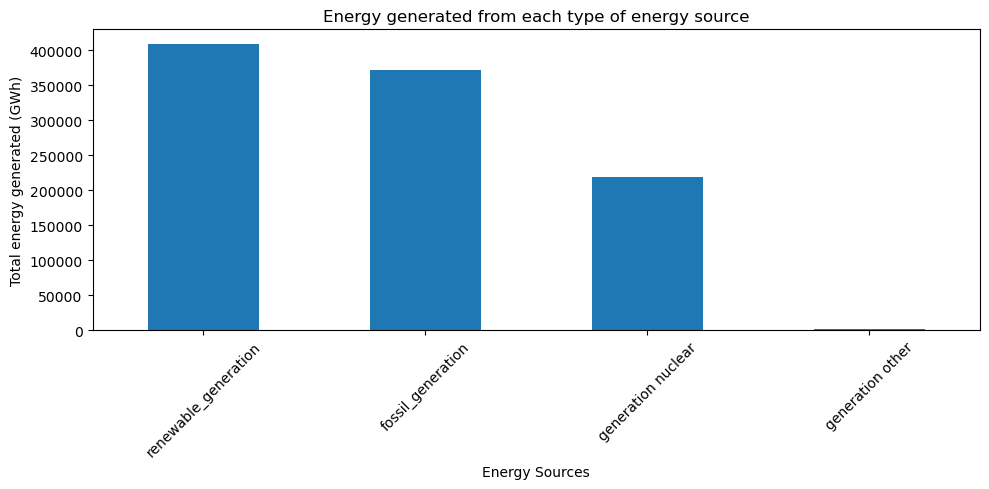

In [71]:
ax=(agg_gen_sources.sum()/10**3).sort_values(ascending=False).plot(kind='bar',figsize=(10,5),
                                                       title='Energy generated from each type of energy source')
ax.set_xlabel('Energy Sources')
ax.set_ylabel('Total energy generated (GWh)')
plt.xticks(rotation=45);

Observation: The analysis indicates that renewable energy sources have made a substantial contribution to the overall energy generation in Spain during the given time period. This can be attributed to the utilization of diverse forms of renewable energy sources. The presence of multiple renewable energy sources, such as wind, hydro, and solar, allows for a more significant share of renewable energy in the country's energy mix. The use of a diverse range of renewable sources has contributed to the increased reliance on renewable energy and the reduction of dependence on fossil fuels.

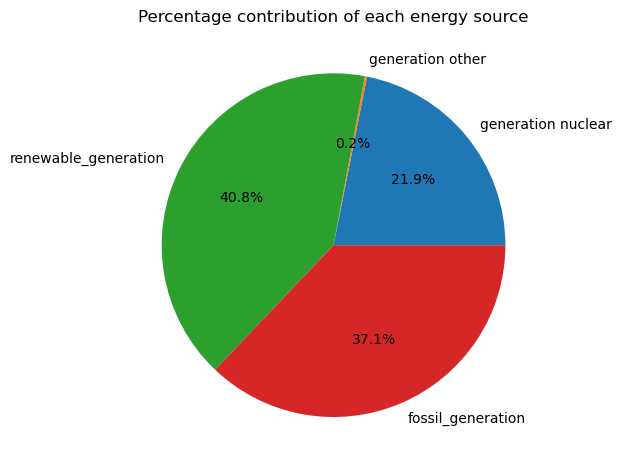

In [72]:
plt.pie(agg_gen_sources.sum(),labels=agg_gen_sources.sum().index,autopct='%.1f%%')
plt.title('Percentage contribution of each energy source');

Renewable energy contributes 40.8% to the total energy generation during the given period

In [73]:
# Observation: To gain a more comprehensive understanding of the contributions of each renewable energy source, further analysis can be performed to determine the specific contribution of wind energy, hydro power, solar energy, and other renewable sources individually. This will provide insights into the relative significance of each source and their respective roles in the renewable energy generation in Spain during the given time period. By examining the specific contributions, we can identify any variations or trends among these renewable sources and assess their overall impact on the country's energy mix.

## Yearly Generation 

In [74]:
(agg_gen_sources.groupby(agg_gen_sources.index.year).sum()/10**3)\
[['generation nuclear', 'renewable_generation','fossil_generation']]

,generation nuclear,renewable_generation,fossil_generation
time,,,
2015,54532.306,101753.291,98181.430
2016,55956.568,109667.163,82996.553
2017,55592.146,91089.895,102004.142
2018,53267.453,106845.634,88853.184


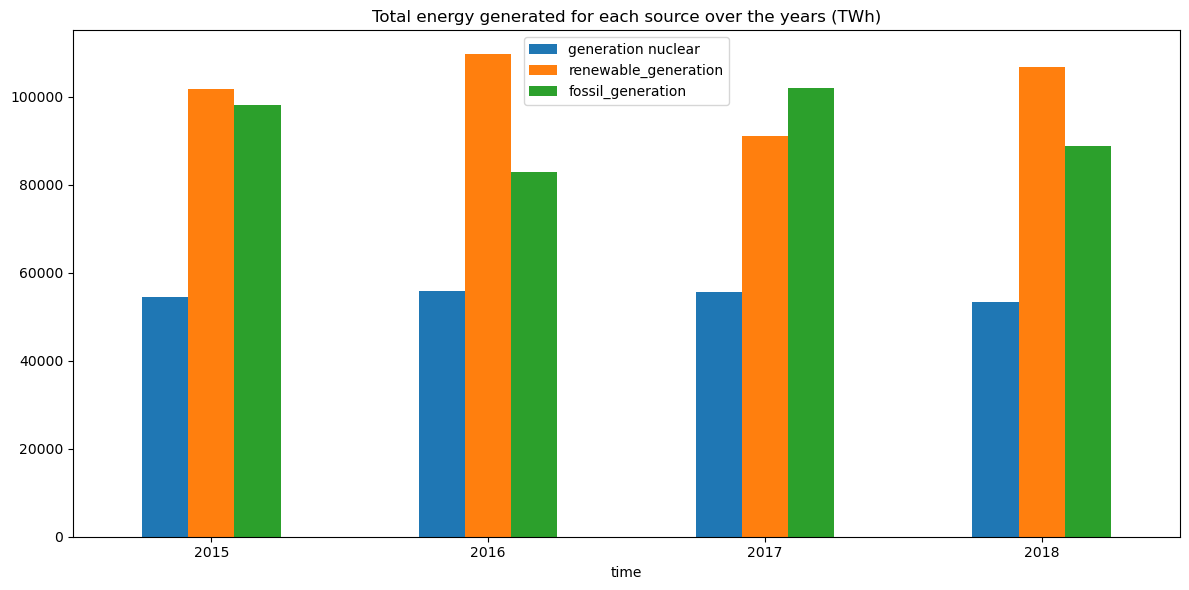

In [75]:
(agg_gen_sources.groupby(agg_gen_sources.index.year).sum()/10**3)\
[['generation nuclear', 'renewable_generation','fossil_generation']].plot(kind='bar',figsize=(12,6))
plt.xticks(rotation=0)
plt.title('Total energy generated for each source over the years (TWh)');

**What Happend in 2017** ?

Observation: In 2017, a notable shift in the energy generation trend occurred in Spain. Historically, renewable energy sources had been the dominant contributors to the country's energy mix, followed by fossil fuel sources. However, in 2017, there was a significant drop in renewable energy generation, leading to a reversal in the dominance of energy sources.

During this period, fossil fuel sources surpassed renewable energy sources and became the dominant contributors to the energy mix. This shift indicates a temporary deviation from the previous trend, highlighting the influence of various factors such as policy changes, market dynamics, or fluctuations in renewable energy availability.

The change in trend observed in 2017 underscores the dynamic nature of energy generation patterns and the importance of monitoring and analyzing such shifts to understand the evolving energy landscape in Spain.

**HYPOTHESIS**: It is that this reduction possible it could be as a result of the decrease in hydro reservoir generation as noticed in our earlier analysis for each generation source in the top 6. 

In [76]:
gen_sources['year'] = gen_sources.index.year

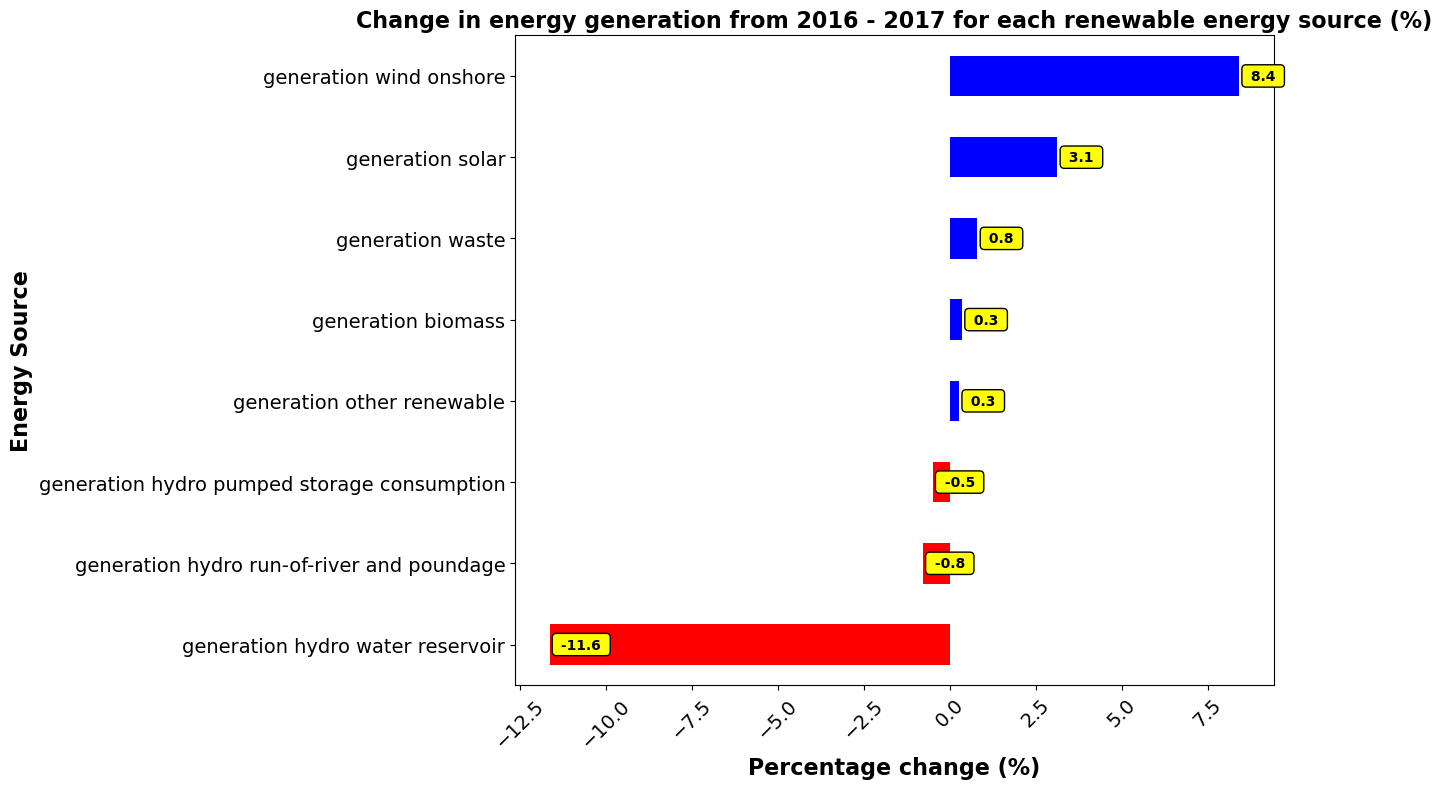

In [77]:
# filtering for 2017
renewables_2017=gen_sources.query('year==2017')[renewables]
renewables_2016=gen_sources.query('year==2016')[renewables]

total_renewables_2016 = renewables_2016.sum().sum()
total_renewables_2017 = renewables_2017.sum().sum()

diff=(renewables_2017.sum()*100/total_renewables_2017 )-(renewables_2016.sum()*100/total_renewables_2016)

ax= diff.sort_values(ascending=True).plot(kind='barh', figsize=(13,8),
                    color=np.where(np.array(diff.sort_values(ascending=True)) < 0, 'red', 'blue'))

for p in ax.patches:
    value = round(p.get_width(),1)
    ax.annotate(f' {value} ', (p.get_width(), p.get_y() + p.get_height() / 2),
                xytext=(5, 0), textcoords='offset points', ha='left', va='center',
                weight='bold', bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', edgecolor='black'))
    

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
ax.set_title('Change in energy generation from 2016 - 2017 for each renewable energy source (%)',fontsize=16, fontweight='bold')
# ax.set_xlabel('Total energy generated (MWh)',fontsize=16, fontweight='bold')
# ax.set_ylabel('Energy Source', fontsize=16, fontweight='bold')
                                                                            
ax.set_xlabel('Percentage change (%)',fontsize=16, fontweight='bold')
ax.set_ylabel('Energy Source',fontsize=16, fontweight='bold');

# plt.grid(True)
plt.xticks(rotation=45);

Analysis confirms that the significant reduction in renewable energy generation observed in 2017 was primarily due to a drastic decrease in hydroelectric power supply. The generation of hydroelectric power experienced a notable decline of approximately -12.5% during that period. This reduction in hydroelectric power generation likely played a substantial role in the overall decrease in renewable energy generation. Further investigation into the reasons behind the decline in hydroelectric power supply would be valuable to gain a comprehensive understanding of the factors influencing the energy landscape in 2017.

Observations:

- Nuclear energy generation has remained constant over the years, indicating a consistent contribution to the energy mix without significant fluctuations.

- In 2016, there were notable efforts to increase the contribution of renewable energy sources. This was accompanied by a significant reduction in energy generation from fossil fuels, indicating a shift towards cleaner and more sustainable energy sources.

- However, the trend reversed in 2017, as renewable energy contribution decreased, reaching its lowest level, while fossil fuel generation had the highest contribution during that year. This suggests a setback or challenges faced by the renewable energy sector during that period.

- The year 2018 witnessed a change in the trend once again, with renewables contributing the most, closely followed by fossil fuels, which is consistent with previous years' patterns.

- There appears to be an inverse correlation between renewable energy generation and fossil fuel generation, implying that when renewable output decreases, fossil fuel sources are utilized more to meet energy demands.

**Hypothesis**: It is hypothesized that during periods of low renewable energy outputs, fossil fuel sources are employed to supplement the total energy generated to fulfill energy demands.

To confirm the correlation between renewable and fossil fuel generation, the `.corr()` function can be utilized to calculate the correlation coefficient, and a scatter plot can be created to visualize the relationship between these two variables. This analysis will provide insights into the potential correlation and help evaluate the hypothesis.


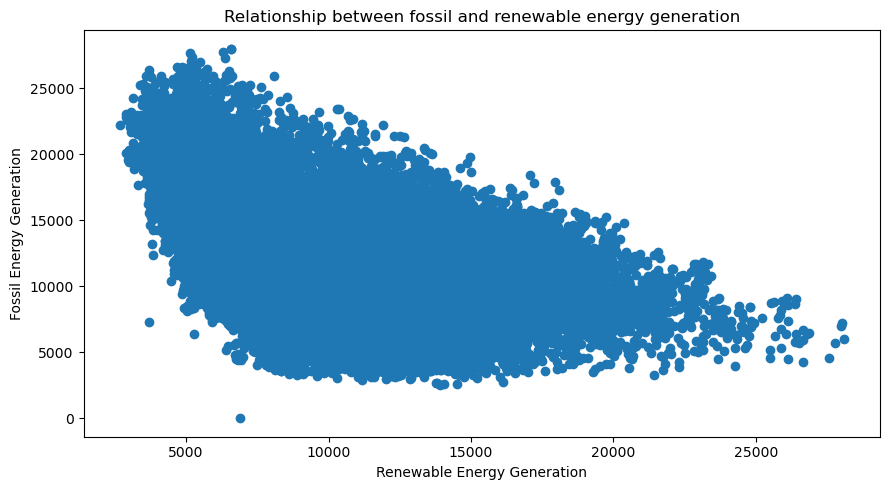

In [78]:
plt.figure(figsize=(9,5))
plt.scatter(agg_gen_sources['fossil_generation'],agg_gen_sources['renewable_generation'])
plt.title('Relationship between fossil and renewable energy generation')
plt.ylabel('Fossil Energy Generation')
plt.xlabel('Renewable Energy Generation');

This clearly shows an inverse relationship. This will provide a quantitative measure of the relationship between these two variables. By analyzing the correlation coefficient, we can assess the strength and direction of the correlation.

In [79]:
correlation=agg_gen_sources[['fossil_generation','renewable_generation']].corr()
correlation

,fossil_generation,renewable_generation
fossil_generation,1.00000,-0.48714
renewable_generation,-0.48714,1.00000


We've got a correlation of -0.487

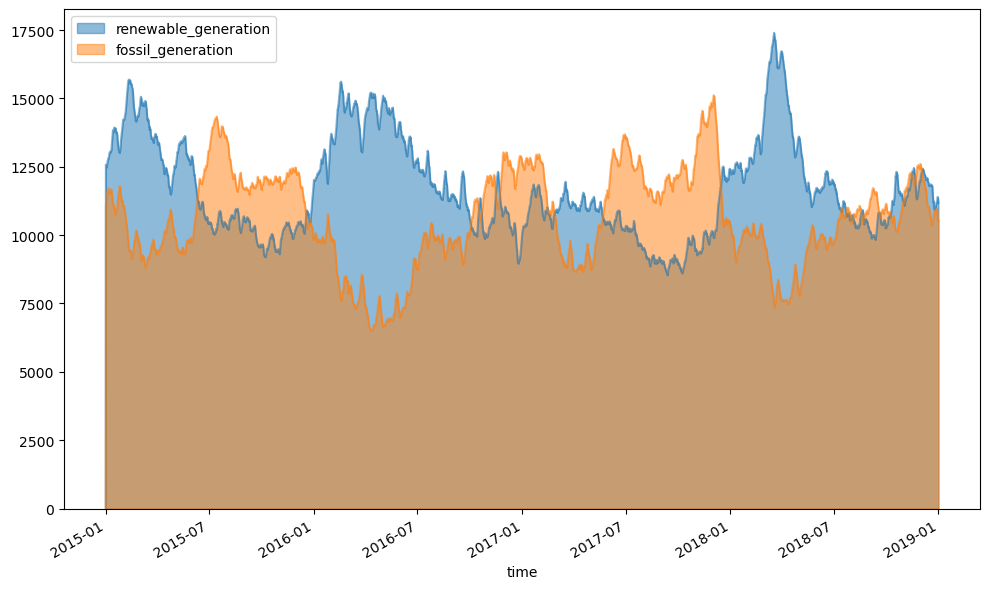

In [80]:
moving_average = agg_gen_sources[['renewable_generation','fossil_generation']].rolling(window=876,
                                         center=True,
                                         min_periods=439).mean()


moving_average.plot.area(stacked=False, figsize=(10,6));


Based on the plot and your observation, it is apparent that there is an inverse relationship between renewable energy generation and fossil fuel generation. When renewable energy generation decreases, there is a corresponding increase in fossil fuel generation, indicating an attempt to compensate for the reduced renewable energy output and meet the energy demands.

## Energy demand

### Energy demand trend and seasonal patterns

In [81]:
demand= energy_df['total load actual']

### Energy demand trend

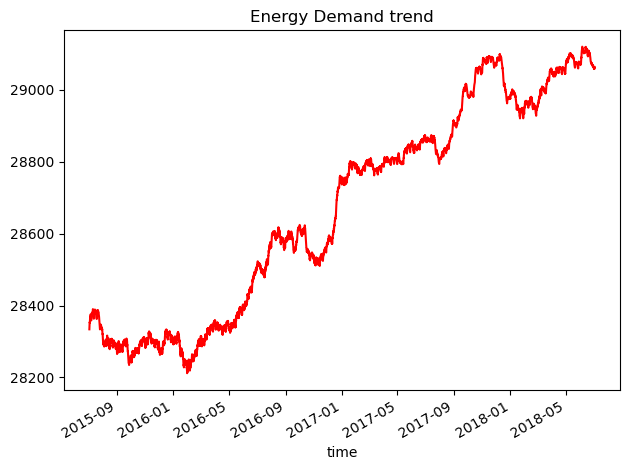

In [82]:
demand_moving_average = demand.rolling(window=8760, center=True).mean()
demand_moving_average.plot(color='red')
plt.title('Energy Demand trend');

Observation: An increasing energy demand has been observed over the years. This indicates a growing need for energy in Spain. The rising energy demand could be attributed to various factors such as population growth, industrial development, technological advancements, and changes in lifestyle and consumption patterns. The upward trend in energy demand highlights the importance of ensuring sufficient and reliable energy supply to meet the growing needs of the country.

## Demand Monthly Pattern

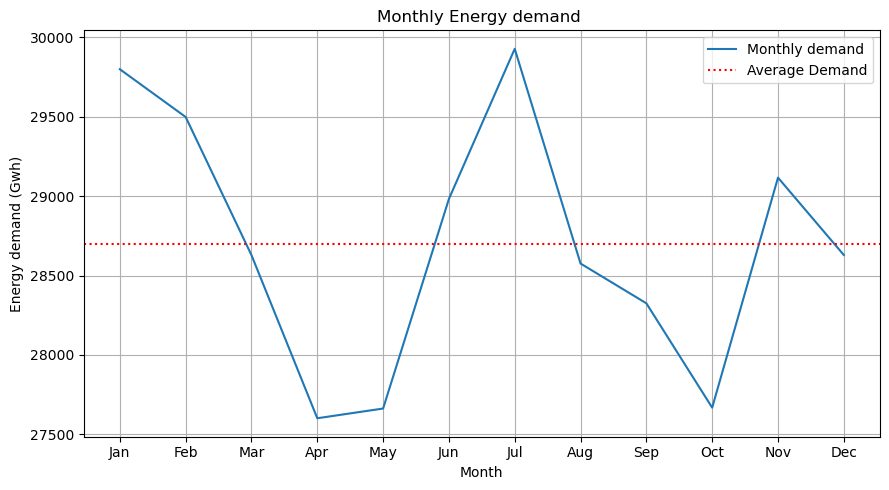

In [99]:
demand=pd.DataFrame(demand)
demand['month']=demand.index.strftime('%b')

avg_monthly_demand=demand.groupby('month', sort=False).mean()

plt.figure(figsize=(9,5))

plt.plot(avg_monthly_demand.index,avg_monthly_demand, label='Monthly demand')
plt.axhline(avg_monthly_demand.mean().values, linestyle='dotted', color='red', label='Average Demand')

plt.ylabel('Energy demand (Gwh)')
plt.xlabel('Month')
plt.title('Monthly Energy demand ')
plt.legend()
plt.grid(True);

Energy demand is highest during the winter and summer seasons aligns with common trends in many regions, including Spain.

During the winter season, the demand for energy increases due to various factors. Cold temperatures lead to a higher need for heating, particularly in residential and commercial buildings. The use of heating systems, such as electric heaters, radiators, or central heating, contributes to increased energy consumption. Additionally, shorter daylight hours during winter can result in higher demand for artificial lighting, further driving up energy usage.

Similarly, in the summer season, energy demand tends to be high due to the need for cooling and air conditioning. With rising temperatures, especially in warmer regions, there is an increased reliance on air conditioning systems to maintain indoor comfort. Cooling requirements in residential, commercial, and industrial buildings lead to a surge in energy consumption during this period.

In [100]:
# # monthly_demand = demand.resample('M').mean().copy()
# check=energy_df.resample('M').mean().copy()
# check['year'] = check.index.year
# check['month'] = check.index.strftime('%b')
# monthly_demand=check.groupby(['year','month'], sort=False).mean()['total load forecast'].reset_index()
# plt.figure(figsize=(10,6))
# average_monthly_demand=monthly_demand.groupby('month', sort=False).mean()
# plt.plot(average_monthly_demand.index,average_monthly_demand['total load forecast'],label='Average monthly demand',lw=2)
# plt.plot(monthly_demand.query('year==2015').month, monthly_demand.query('year==2015')['total load forecast'],label='2015',alpha=0.3)
# plt.plot(monthly_demand.query('year==2016').month, monthly_demand.query('year==2016')['total load forecast'],label='2016',alpha=0.3)
# plt.plot(monthly_demand.query('year==2017').month, monthly_demand.query('year==2017')['total load forecast'],label='2017',alpha=0.3)
# plt.plot(monthly_demand.query('year==2018').month, monthly_demand.query('year==2018')['total load forecast'],label='2018',alpha=0.3)
# plt.legend()
# plt.grid(True);
# # monthly_demand.plot();

**TO BE REVIEWED**

Observation: The analysis of energy demand patterns reveals that the energy demand tends to peak in January and July, while it reaches its lowest point in April, May, and October. These seasonal variations in energy demand could be influenced by factors such as weather conditions, economic activities, holiday periods, and energy consumption patterns.

The higher energy demand during January and July might be attributed to extreme weather conditions, such as cold temperatures or heatwaves, which increase the need for heating or cooling. Additionally, increased industrial and commercial activities during these months, along with holiday periods, can contribute to higher energy consumption.

Conversely, the lower energy demand observed in April, May, and October could be due to milder weather conditions, reduced industrial activities, and a decrease in overall energy consumption.

Understanding these seasonal variations in energy demand is crucial for energy planning, resource allocation, and ensuring a reliable energy supply throughout the year.

- Summer months: June, July, August and September
- Winter months: November, December, January and February

**Are the energy generation meeting the total demands ?**

In [101]:
energy_df['total_generation']=energy_df.iloc[:,:-6].sum(axis=1)

In [102]:
energy_df.head()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual,total_generation
time,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41,28251.0
2015-01-01 01:00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,16.0,5856.0,24934.0,24382.0,48.10,64.92,27818.0
2015-01-01 02:00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,8.0,5454.0,23515.0,22734.0,47.33,64.48,26796.0
2015-01-01 03:00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,2.0,5151.0,22642.0,21286.0,42.27,59.32,25223.0
2015-01-01 04:00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,9.0,4861.0,21785.0,20264.0,38.41,56.04,24620.0


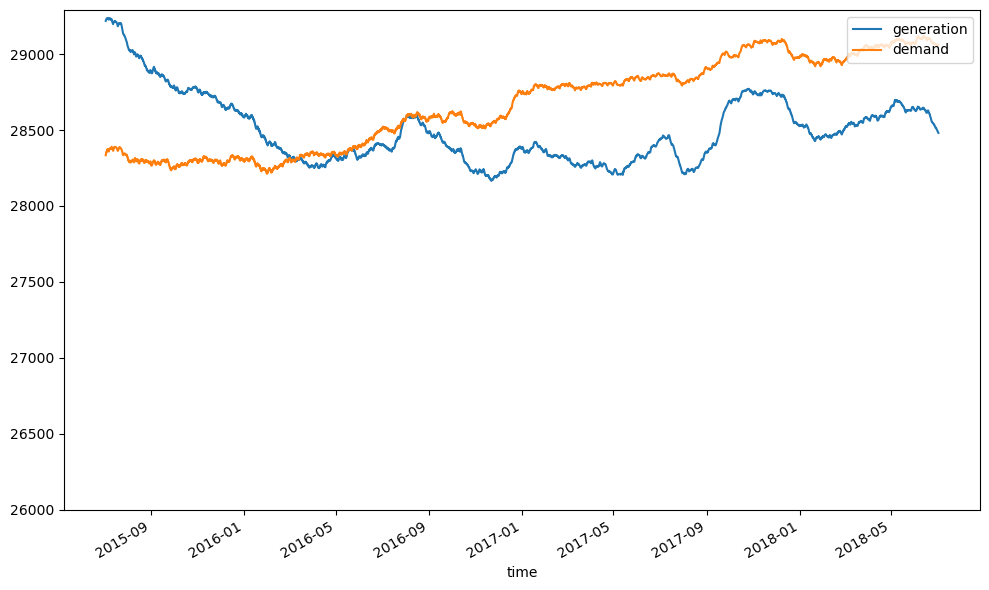

In [103]:
total_generation=energy_df['total_generation']
total_moving_average=total_generation.rolling(window=8760, center=True).mean()
plt.figure(figsize=(10,6))
total_moving_average.plot(label='generation')
demand_moving_average.plot(label='demand')
plt.ylim(bottom=26000)
plt.legend(loc='upper right');

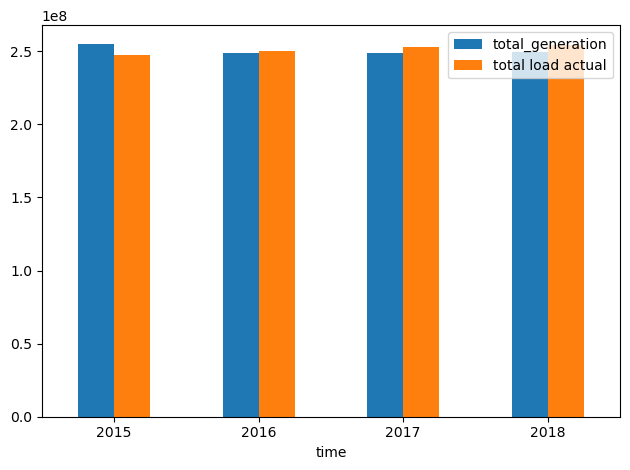

In [104]:
energy_df[['total_generation','total load actual']].groupby(energy_df.index.year).sum().plot(kind='bar')
plt.xticks(rotation=0);

Observation: It is observed that the total energy generated over the analyzed period has been close to meeting the energy demands. However, it is noteworthy that the energy demands have consistently exceeded the energy generated since late 2016. This indicates a growing energy deficit, where the energy generation is insufficient to fully meet the demands.

The increasing energy deficit can be attributed to several factors such as population growth, economic development, and increasing energy consumption. This trend highlights the need for additional efforts to increase energy generation capacity, optimize energy efficiency, and explore alternative energy sources to bridge the gap between energy supply and demand.

Addressing the energy deficit is crucial to ensure a stable and reliable energy supply in the future and to support the growing energy needs of the country.

## Monthly energy demand and supply pattern

In [105]:
sup_and_dem = energy_df[['total_generation','total load actual']].copy()

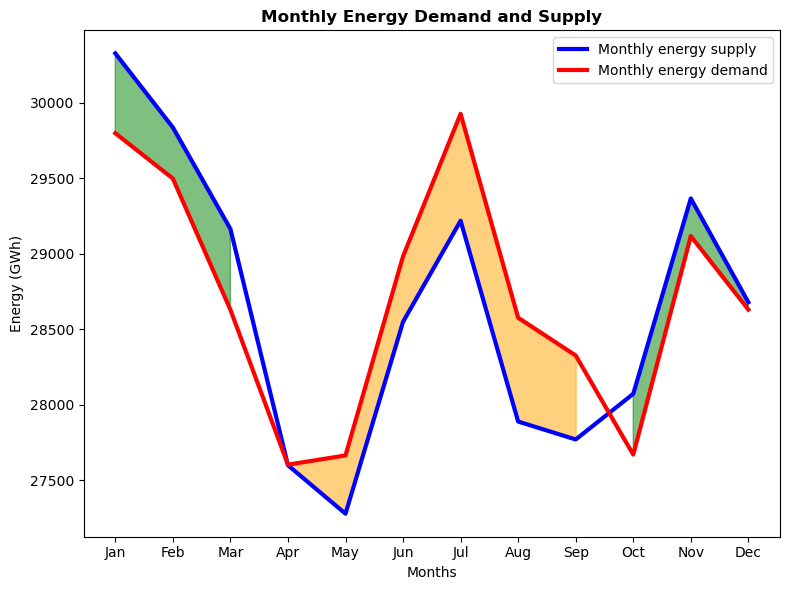

In [107]:
sup_and_dem['month'] = sup_and_dem.index.strftime('%b')

avg_monthly_gen = sup_and_dem.groupby('month', sort=False).mean()

plt.figure(figsize=(8,6))

plt.plot(avg_monthly_gen.index,avg_monthly_gen.total_generation, label='Monthly energy supply',lw=3,color='blue')
plt.plot(avg_monthly_gen.index,avg_monthly_gen['total load actual'], label='Monthly energy demand', lw=3,color='red')


plt.fill_between(avg_monthly_gen.index, avg_monthly_gen.total_generation, avg_monthly_gen['total load actual'],
                 where=(avg_monthly_gen.total_generation > avg_monthly_gen['total load actual']), 
                 color='green', alpha=0.5)

plt.fill_between(avg_monthly_gen.index, avg_monthly_gen.total_generation, avg_monthly_gen['total load actual'],
                 where=(avg_monthly_gen['total load actual'] > avg_monthly_gen.total_generation), 
                 color='orange', alpha=0.5);

plt.title('Monthly Energy Demand and Supply', fontweight='bold')
plt.ylabel('Energy (GWh)')
plt.xlabel('Months')

plt.legend();



This clearly shows that the energy demands are not been met during the summer periods. Actions should be taken to leverage the power of solar energy for this period. For example for solar units be installed or creating solar farms to increase the share of solar energy generation

In [108]:
avg_monthly_gen.head()

,total_generation,total load actual
month,,
Jan,30327.660034,29798.536594
Feb,29836.814513,29497.978897
Mar,29163.906460,28628.461642
Apr,27597.806474,27601.733032
May,27276.693912,27662.861419


## Key Insights


Key Insights:

- **Renewable Energy Dominance**: Renewable energy sources, particularly wind and hydro, have played a significant role in Spain's energy mix during the analyzed period. They have consistently been the primary contributors to the country's renewable energy generation, highlighting Spain's commitment to sustainable energy solutions.

- **Challenges in Renewable Energy**: While renewable energy sources have shown consistent growth, there have been fluctuations in their contribution, particularly in 2017. This highlights the challenges and potential setbacks faced by the renewable energy sector, emphasizing the need for continued support and measures to enhance renewable energy deployment.

- **Inverse Relationship between Renewable and Fossil Fuel Generation**: There is a clear inverse relationship between renewable energy generation and fossil fuel generation in Spain. When renewable energy output decreases, there is a corresponding increase in fossil fuel generation, indicating their role as a backup or supplementary source during periods of low renewable energy availability.

- **Seasonal Variations**: Seasonal patterns influence energy generation in Spain. Winter and summer months experience higher energy demand due to heating and cooling requirements, respectively. Understanding these seasonal variations is crucial for effective energy planning and optimizing energy supply during peak demand periods.

- **Growing Energy Deficit**: The analysis reveals a growing energy deficit in Spain since late 2016, with energy demands consistently surpassing the energy generated. This highlights the need for additional efforts to increase energy generation capacity, optimize energy efficiency, and explore alternative energy sources to bridge the gap between supply and demand.

- **Nuclear Energy Stability**: Nuclear energy has demonstrated consistent generation levels throughout the analyzed period, indicating its role as a reliable and stable energy source in Spain's energy mix.

- **Importance of Energy Demand Management**: Managing energy demand is crucial for ensuring a stable and reliable energy supply. Energy efficiency measures, demand-response programs, and promoting energy-conscious behavior can help mitigate the strain on the energy system and contribute to a more sustainable energy future.

- **Role of Policy Support**: Policy support for renewable energy deployment is essential for driving the transition to a greener energy mix. Continued investment, supportive regulatory frameworks, and incentives can further accelerate the growth of renewable energy and reduce dependence on fossil fuels.

These key insights provide valuable information for policymakers, energy planners, and stakeholders in Spain. They highlight the opportunities, challenges, and areas of focus required to shape a sustainable and resilient energy future for the country.